In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Task :1 . Download the data from the file data source and provide possible data insights.
    


In [2]:
df_1 = pd.read_csv("C:\\Users\\User\\Downloads\\complaints.csv\\complaints.csv")

In [3]:
df_1

Date received                                            Product  \
0          2024-01-24  Credit reporting or other personal consumer re...   
1          2024-02-26                                    Debt collection   
2          2024-02-26  Credit reporting or other personal consumer re...   
3          2024-02-20  Credit reporting or other personal consumer re...   
4          2024-01-26  Credit reporting or other personal consumer re...   
...               ...                                                ...   
5167777    2023-08-02  Credit reporting, credit repair services, or o...   
5167778    2023-08-02          Payday loan, title loan, or personal loan   
5167779    2023-08-02                                           Mortgage   
5167780    2023-08-02  Credit reporting, credit repair services, or o...   
5167781    2023-08-04          Payday loan, title loan, or personal loan   

              Sub-product                                              Issue  \
0        Credit reporting               Incorrect information on your report   
1              Other debt  Threatened to contact someone or share informa...   
2        Credit reporting               Incorrect information on your report   
3        Credit reporting                        Improper use of your report   
4        Credit reporting               Incorrect information on your report   
...                   ...                                                ...   
5167777  Credit reporting               Incorrect information on your report   
5167778  Installment loan  Problem with additional add-on products or ser...   
5167779      FHA mortgage                         Struggling to pay mortgage   
5167780  Credit reporting                        Improper use of your report   
5167781       Payday loan         Charged fees or interest you didn't expect   

                                             Sub-issue  \
0                        Account information incorrect   
1              Talked to a third-party about your debt   
2                  Information belongs to someone else   
3        Reporting company used your report improperly   
4                  Information belongs to someone else   
...                                                ...   
5167777            Information belongs to someone else   
5167778                                            NaN   
5167779                                            NaN   
5167780  Reporting company used your report improperly   
5167781                                            NaN   

                              Consumer complaint narrative  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3        I am disappointed to have received a credit re...   
4        The companies, along with the credit reporting...   
...                                                    ...   
5167777                                                NaN   
5167778                                                NaN   
5167779                                                NaN   
5167780                                                NaN   
5167781                                                NaN   

                                   Company public response  \
0        Company has responded to the consumer and the ...   
1                                                      NaN   
2        Company believes it acted appropriately as aut...   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
5167777                                                NaN   
5167778                                                NaN   
5167779  Company believes it acted appropriately as aut...   
5167780                                                NaN   
5167781   

In [4]:
# checking the dataset shape
df_1.shape

(5167782, 18)

In [5]:
# checking the null values in the dataset
df_1.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 2
Sub-issue                        735101
Consumer complaint narrative    3351574
Company public response         2693192
Company                               0
State                             45611
ZIP code                          30225
Tags                            4684932
Consumer consent provided?      1026812
Submitted via                         0
Date sent to company                  0
Company response to consumer         14
Timely response?                      0
Consumer disputed?              4399466
Complaint ID                          0
dtype: int64

In [6]:
# checking the null values in the dataset with perctages
missing_percentage = df_1.isnull().mean() * 100
missing_percentage

Date received                    0.000000
Product                          0.000000
Sub-product                      4.553056
Issue                            0.000039
Sub-issue                       14.224691
Consumer complaint narrative    64.855174
Company public response         52.115047
Company                          0.000000
State                            0.882603
ZIP code                         0.584874
Tags                            90.656533
Consumer consent provided?      19.869491
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000271
Timely response?                 0.000000
Consumer disputed?              85.132577
Complaint ID                     0.000000
dtype: float64

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167782 entries, 0 to 5167781
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 709.

# 1.Top Complaint Categories:

In [9]:
# Count the number of complaints per product
complaints_per_product = df_1['Product'].value_counts()
complaints_per_product

Product
Credit reporting, credit repair services, or other personal consumer reports    2163878
Credit reporting or other personal consumer reports                              959581
Debt collection                                                                  567007
Mortgage                                                                         397811
Checking or savings account                                                      212459
Credit card or prepaid card                                                      206373
Credit reporting                                                                 140429
Credit card                                                                      132976
Student loan                                                                      88116
Bank account or service                                                           86205
Money transfer, virtual currency, or money service                                68346
Vehicle loan or lease   

# 2.Company Performance:

In [10]:

company_responses_percentage = df_1['Company response to consumer'].value_counts(normalize=True) * 100
company_responses_percentage


Company response to consumer
Closed with explanation            66.679096
Closed with non-monetary relief    25.109196
In progress                         4.233607
Closed with monetary relief         2.966774
Closed without relief               0.345759
Closed                              0.340785
Untimely response                   0.222146
Closed with relief                  0.102636
Name: proportion, dtype: float64

# 3.Timeliness of Responses:

In [11]:

timely_responses_percentage = df_1['Timely response?'].value_counts(normalize=True) * 100
timely_responses_percentage


Timely response?
Yes    98.86698
No      1.13302
Name: proportion, dtype: float64

# 4.Geographical Analysis:

In [12]:

complaints_per_state = df_1['State'].value_counts(normalize=True, ascending=False).head(15) * 100

complaints_per_state


State
FL    12.091767
CA    11.517538
TX    10.749934
GA     6.915759
NY     6.477117
PA     4.781469
IL     4.208352
NJ     3.410624
NC     3.285833
MD     2.643332
OH     2.532578
VA     2.429595
MI     2.318704
AL     1.871765
SC     1.855248
Name: proportion, dtype: float64

# 5. Trends Over Time:

In [13]:

df_1['Date received'] = pd.to_datetime(df_1['Date received'])
complaints_per_year = df_1['Date received'].dt.year.value_counts().sort_index()

complaints_per_year

Date received
2011       2536
2012      72372
2013     108215
2014     153008
2015     168437
2016     191414
2017     242854
2018     257220
2019     277298
2020     444294
2021     496004
2022     800359
2023    1292154
2024     661617
Name: count, dtype: int64

# 6.Consumer Disputes:

In [14]:

consumer_disputes_percentage = df_1['Consumer disputed?'].value_counts(normalize=True) * 100
consumer_disputes_percentage


Consumer disputed?
No     80.687894
Yes    19.312106
Name: proportion, dtype: float64

# 7.Effectiveness of Public Responses:

In [15]:

public_response_percentage = df_1['Company public response'].value_counts(normalize=True) * 100
public_response_percentage


Company public response
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            89.936353
Company believes it acted appropriately as authorized by contract or law                                                    5.828925
Company chooses not to provide a public response                                                                            2.120472
Company believes the complaint is the result of a misunderstanding                                                          0.533018
Company disputes the facts presented in the complaint                                                                       0.454378
Company believes complaint caused principally by actions of third party outside the control or direction of the company     0.317386
Company believes complaint is the result of an isolated error                                                               0.256285
Company believes complaint represents an oppo

# EDA PART:


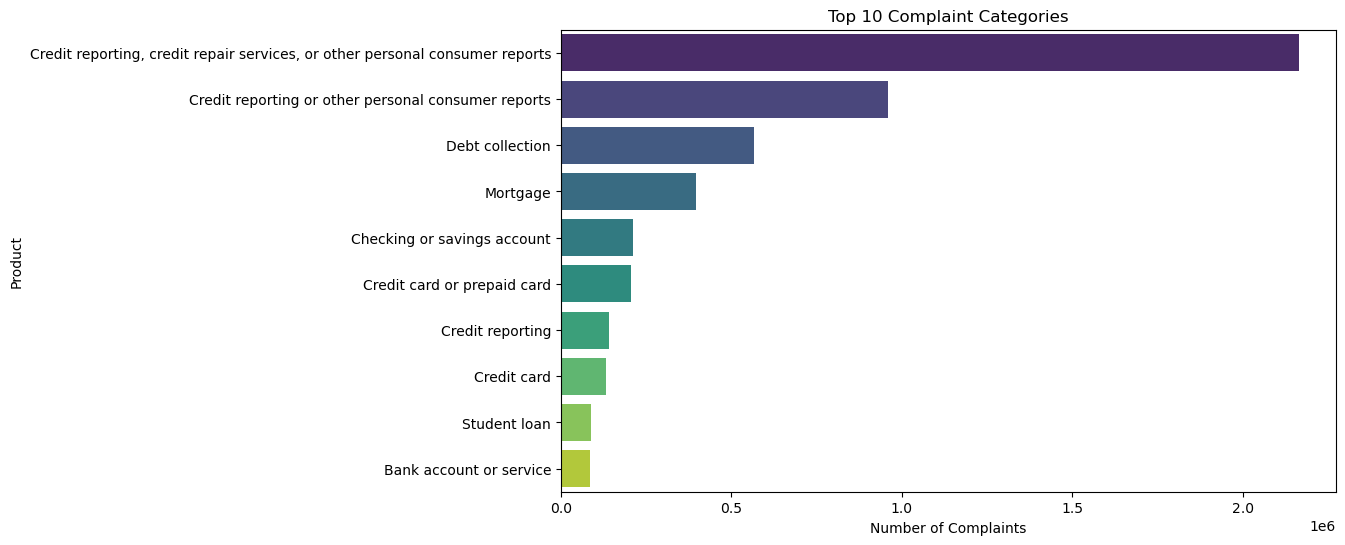

In [16]:
# Top complaint categories
top_complaints = df_1['Product'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_complaints.values, y=top_complaints.index, palette='viridis')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.title('Top 10 Complaint Categories')
plt.show();

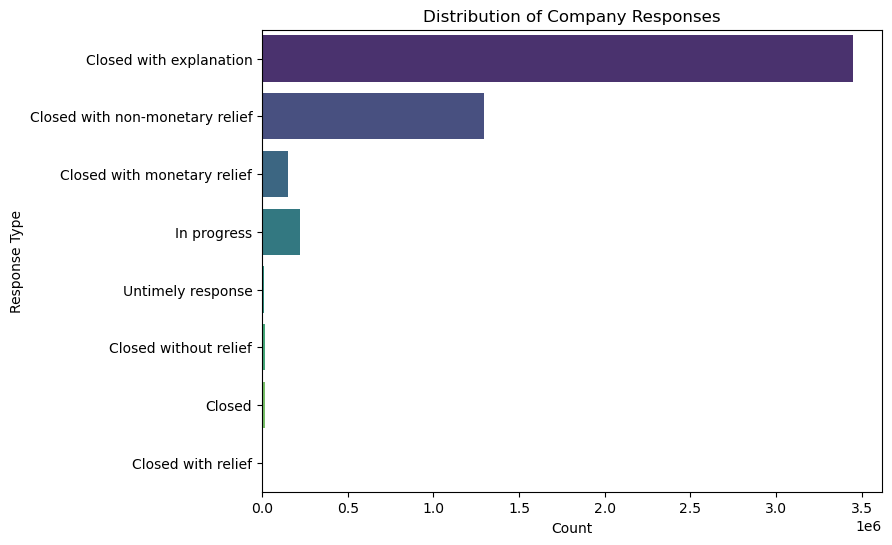

In [17]:
# Distribution of company responses
plt.figure(figsize=(8, 6))
sns.countplot(y='Company response to consumer', data=df_1,palette='viridis')
plt.xlabel('Count')
plt.ylabel('Response Type')
plt.title('Distribution of Company Responses')
plt.show();

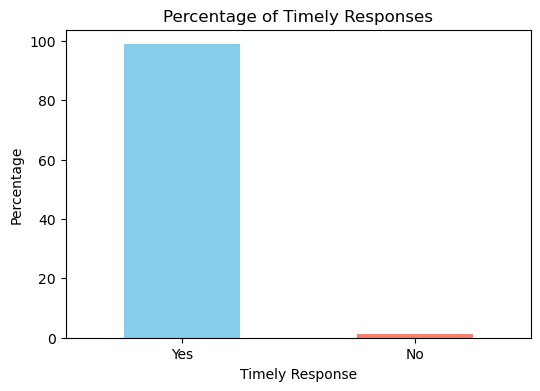

In [18]:
# Timeliness of responses
timely_responses = df_1['Timely response?'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
timely_responses.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Timely Response')
plt.ylabel('Percentage')
plt.title('Percentage of Timely Responses')
plt.xticks(rotation=0)
plt.show();

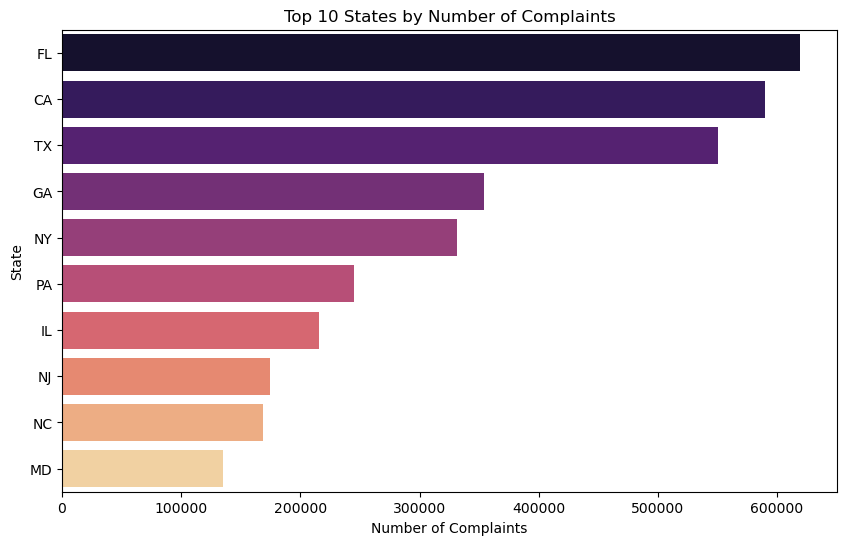

In [19]:
# Geographical analysis
top_states = df_1['State'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='magma')
plt.xlabel('Number of Complaints')
plt.ylabel('State')
plt.title('Top 10 States by Number of Complaints')
plt.show();

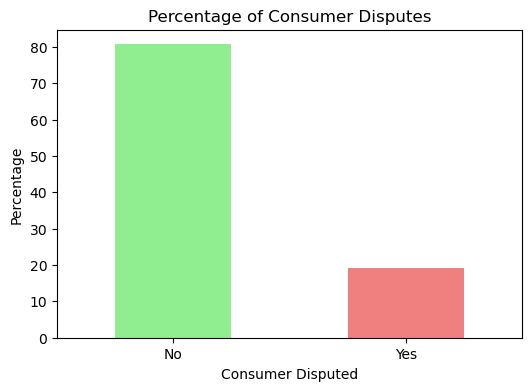

In [20]:
# Consumer disputes
consumer_disputes = df_1['Consumer disputed?'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
consumer_disputes.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.xlabel('Consumer Disputed')
plt.ylabel('Percentage')
plt.title('Percentage of Consumer Disputes')
plt.xticks(rotation=0)
plt.show();

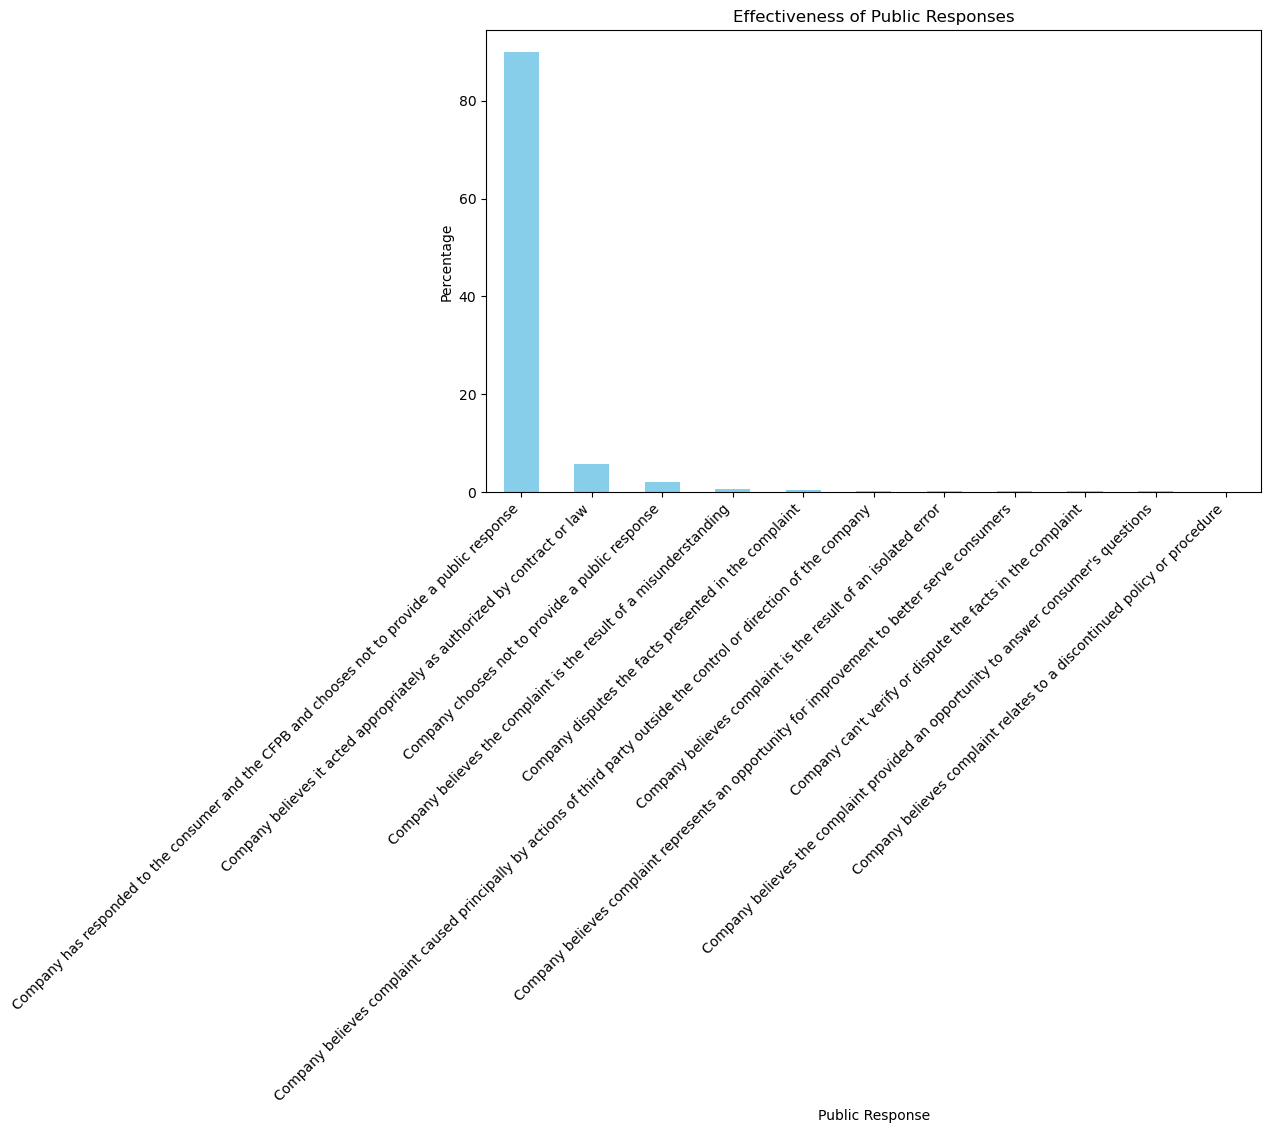

In [21]:
# Effectiveness of public responses
public_responses = df_1['Company public response'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
public_responses.plot(kind='bar', color='skyblue')
plt.xlabel('Public Response')
plt.ylabel('Percentage')
plt.title('Effectiveness of Public Responses')
plt.xticks(rotation=45, ha='right')
plt.show();

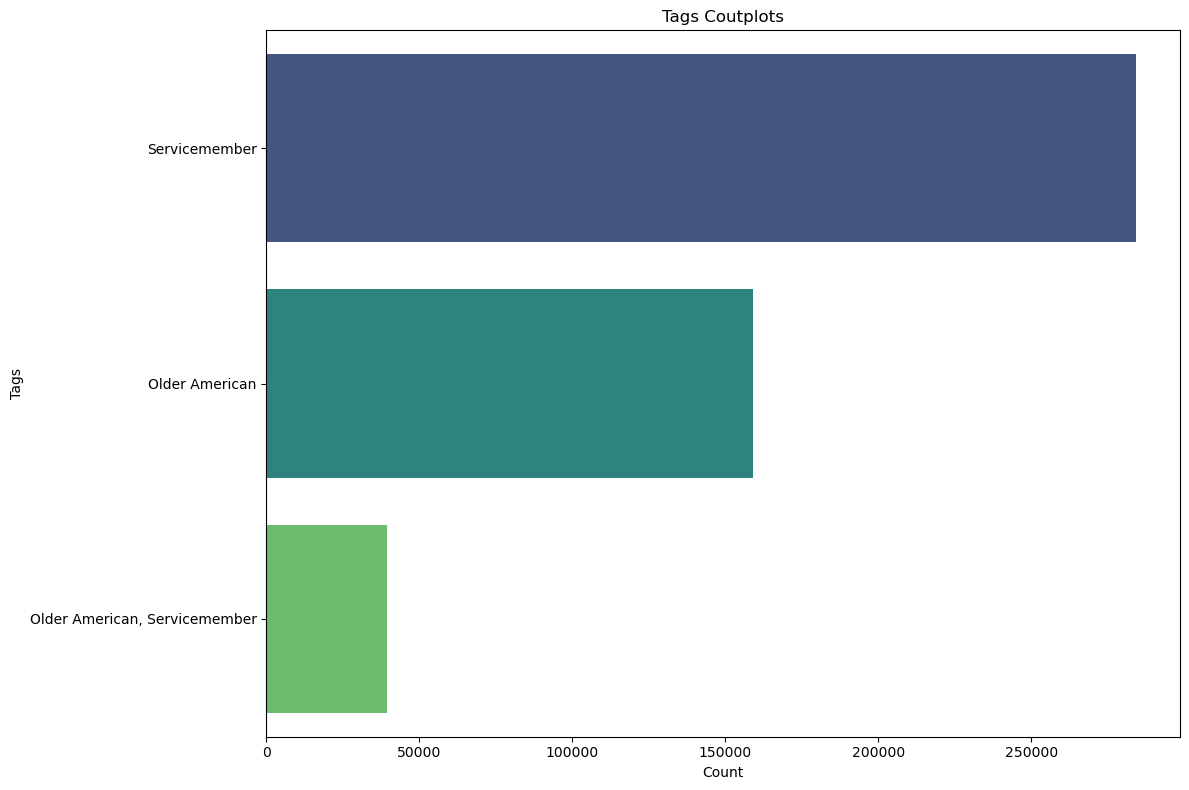

In [46]:
# the top tags 
top_tags = df_1['Tags'].value_counts().head(10).index
df_top_tags = df_1[df_1['Tags'].isin(top_tags)]

#  Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_tags, y='Tags', order=top_tags, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Tags')
plt.title('Tags Coutplots')
plt.tight_layout()
plt.show();

# Trends Over Time

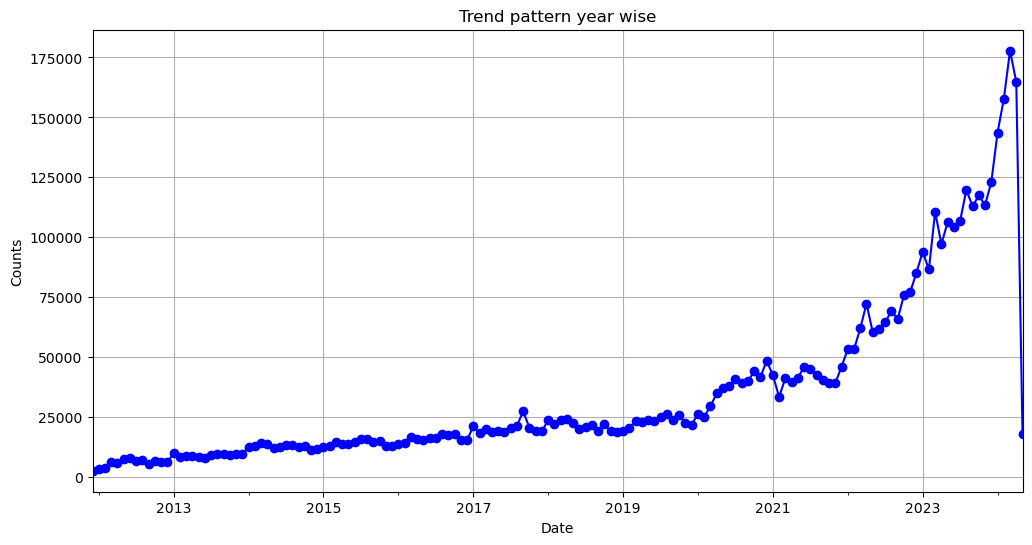

In [72]:
# Calculate the total number of complaints per month
df_1['Date received'] = pd.to_datetime(df_1['Date received'])
complaints_per_month = df_1.resample('M', on='Date received').size()

plt.figure(figsize=(12, 6))
complaints_per_month.plot(kind='line', marker='o', color='b')
plt.title('Trend pattern year wise')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.grid(True)
plt.show();


<Figure size 1200x600 with 0 Axes>

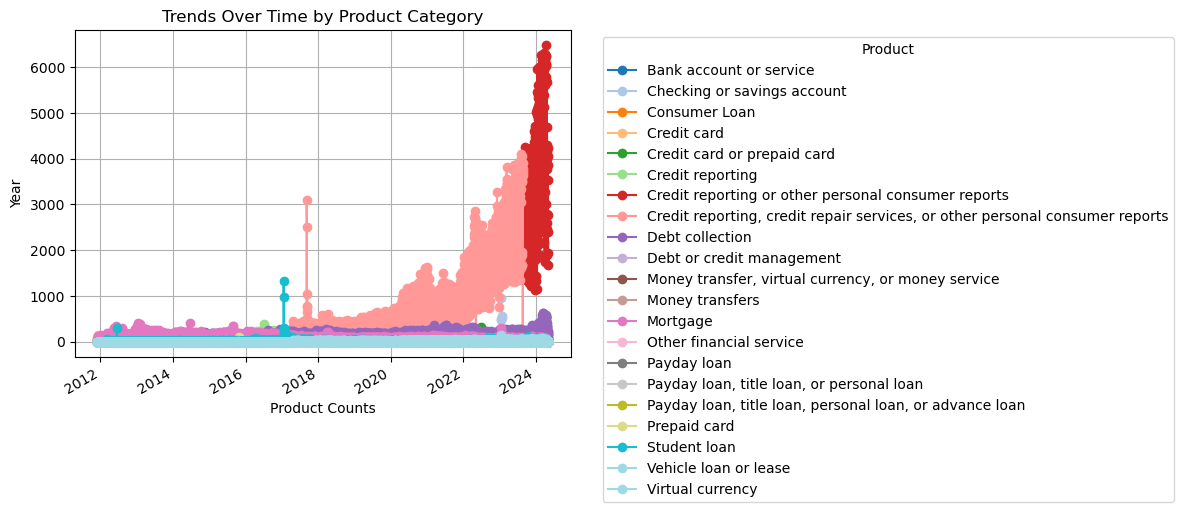

In [73]:
# 'Date received' to datetime format
df_1['Date received'] = pd.to_datetime(df_1['Date received'])

# Group by 'Date received' and 'Product' and count the number of complaints
complaints_by_date_product = df_1.groupby(['Date received', 'Product']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
complaints_by_date_product.plot(kind='line', marker='o', cmap='tab20')
plt.title('Trends Over Time by Product Category')
plt.xlabel('Product Counts')
plt.ylabel('Year')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show();


# Top products vs Issues:

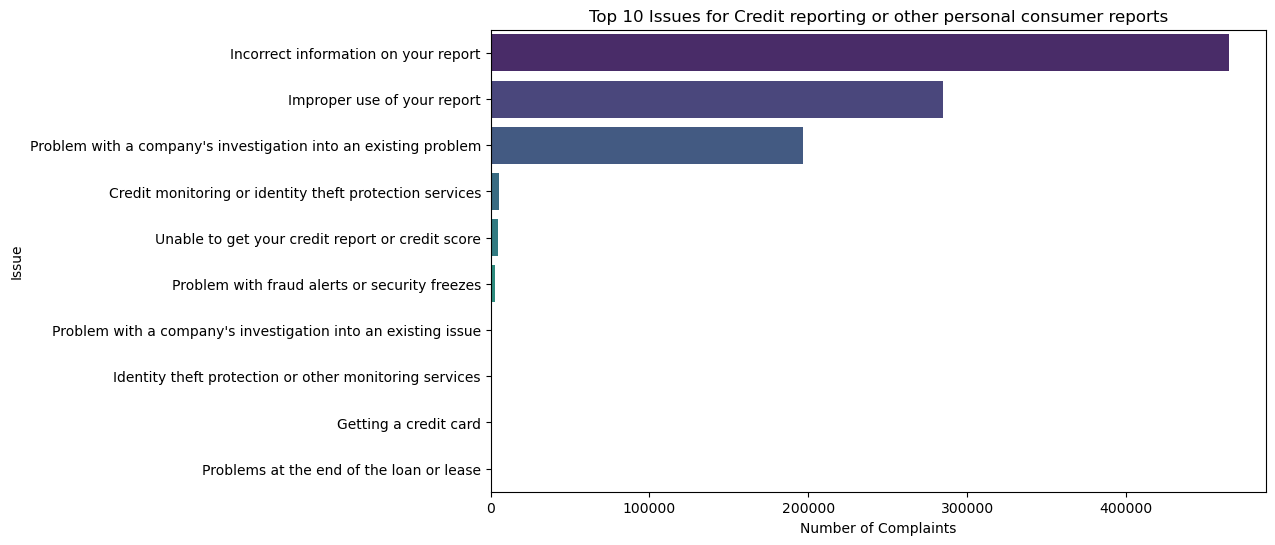

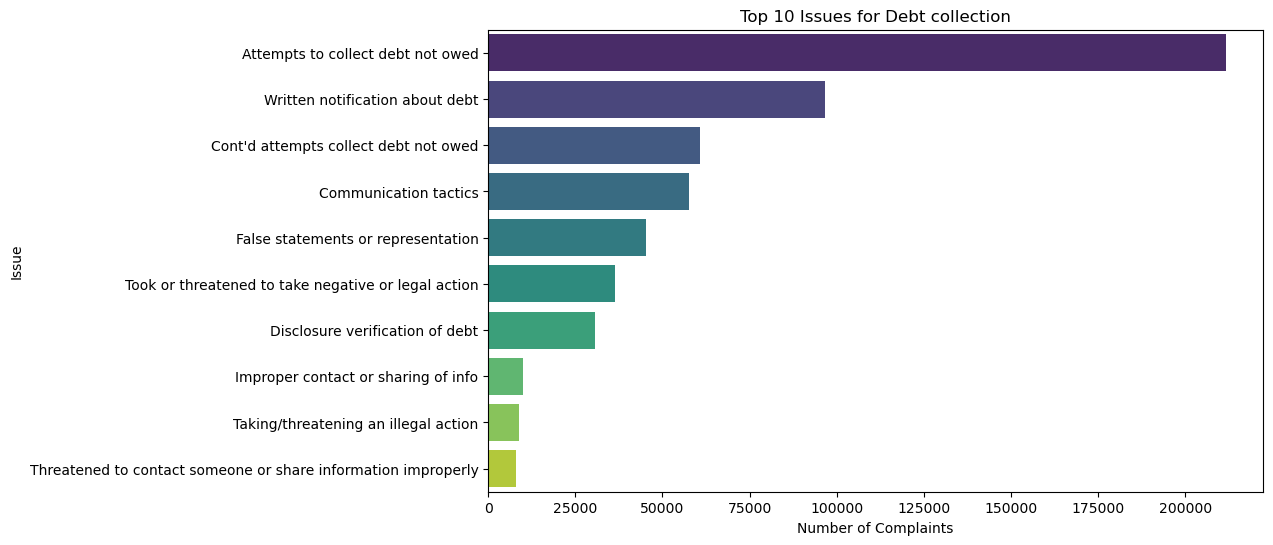

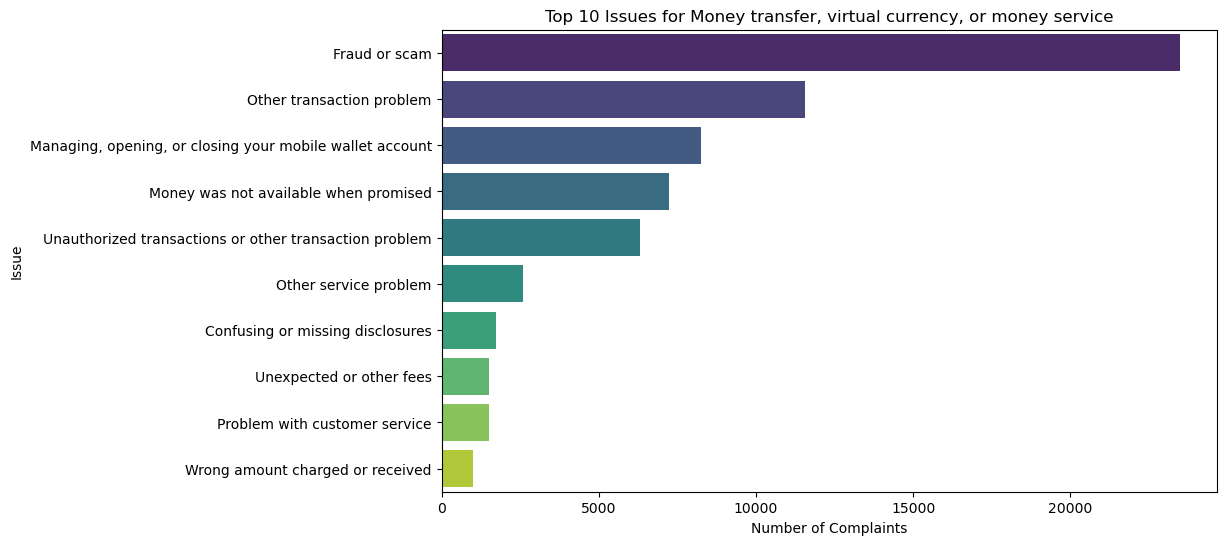

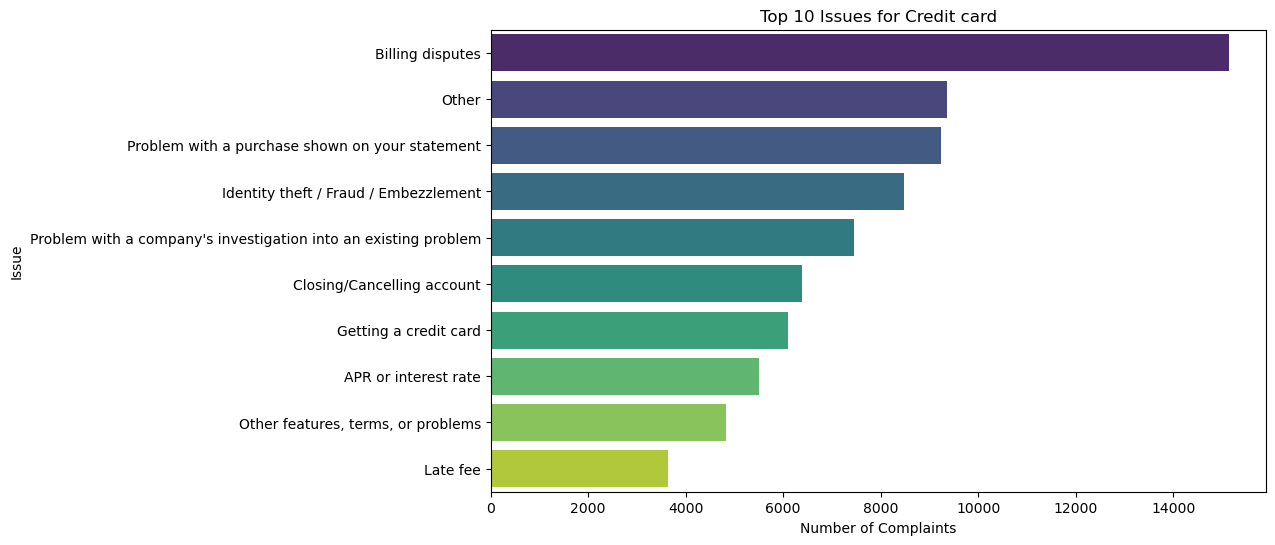

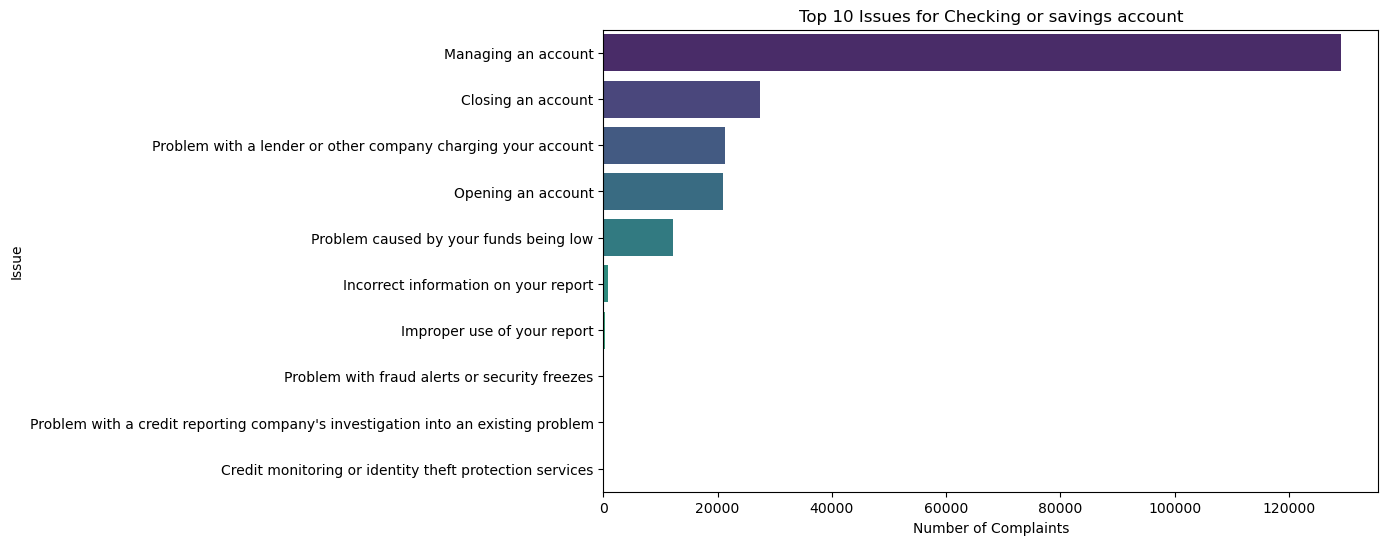

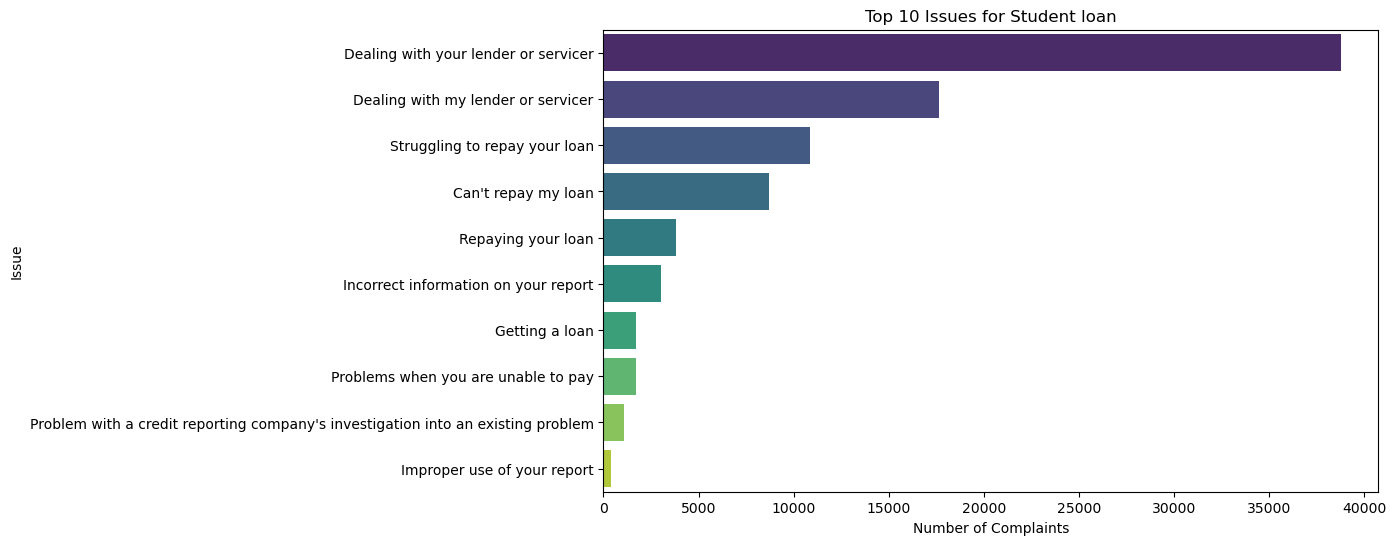

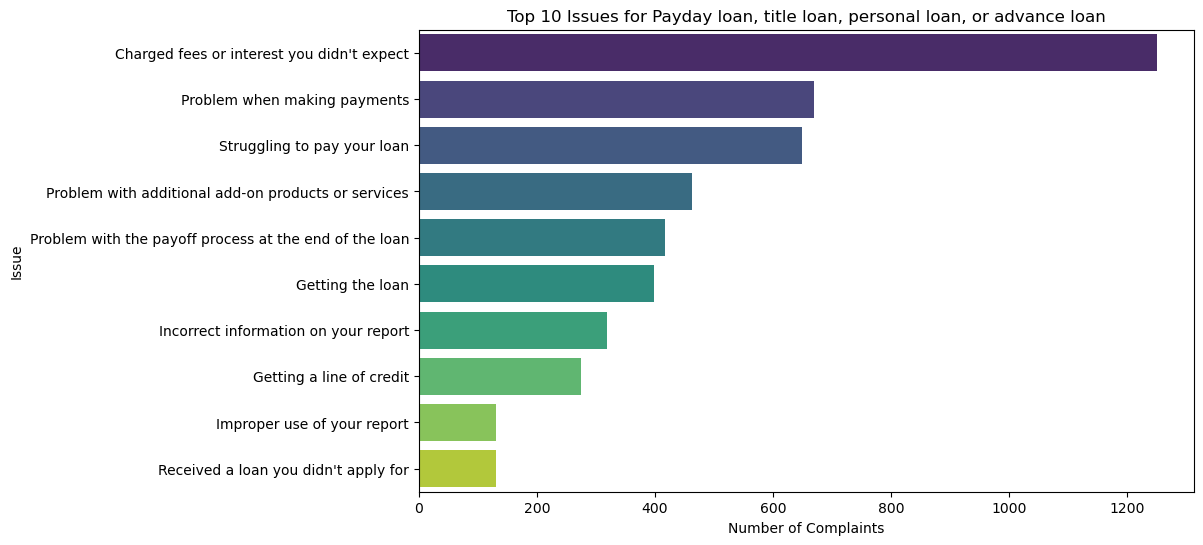

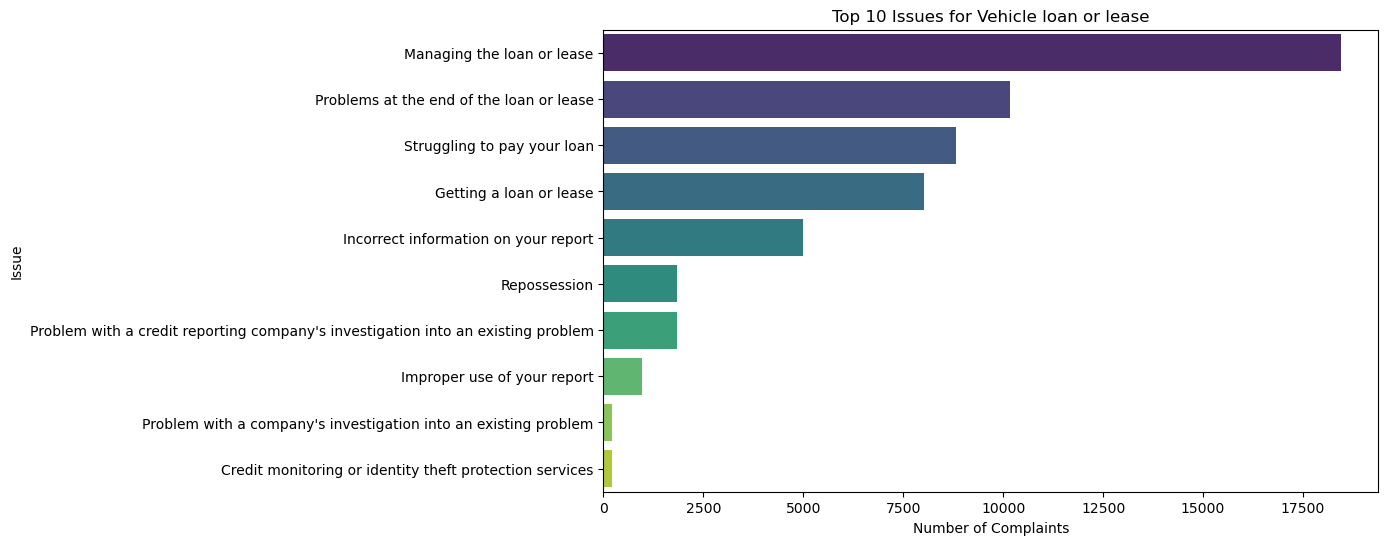

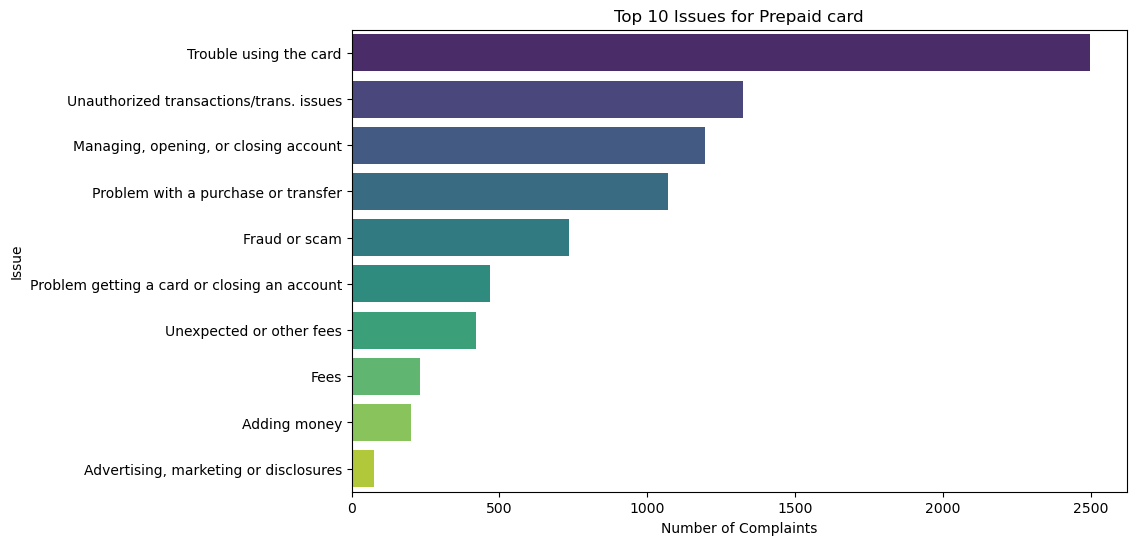

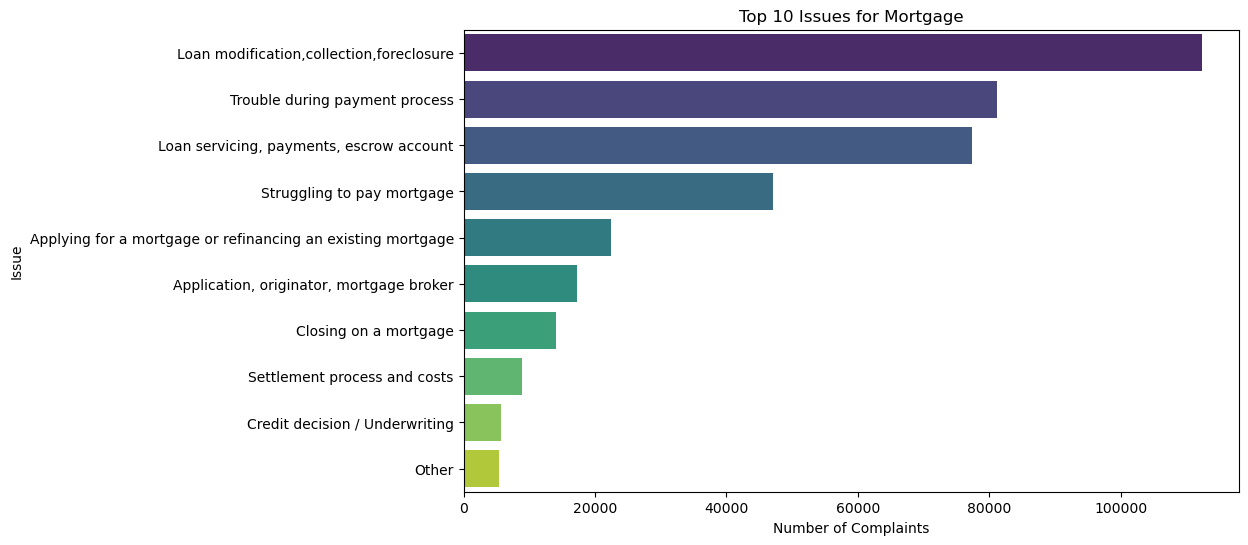

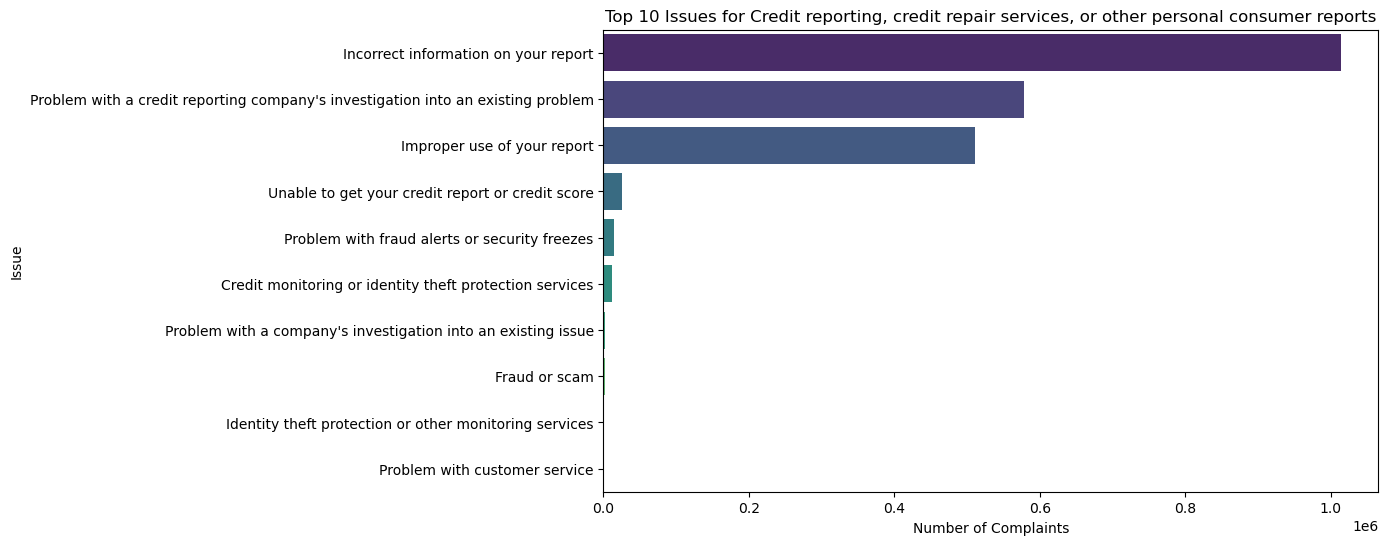

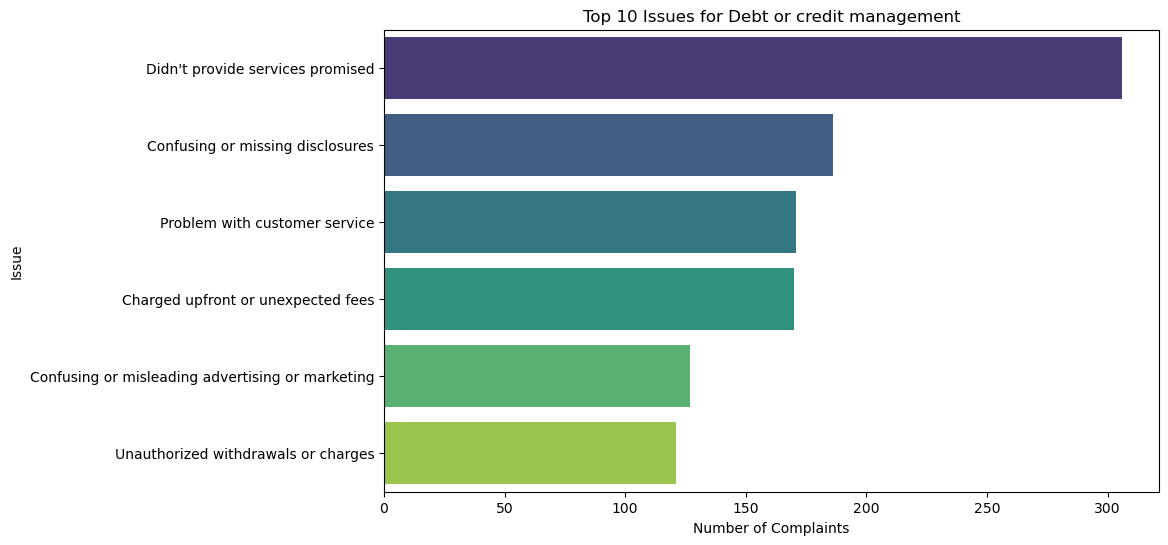

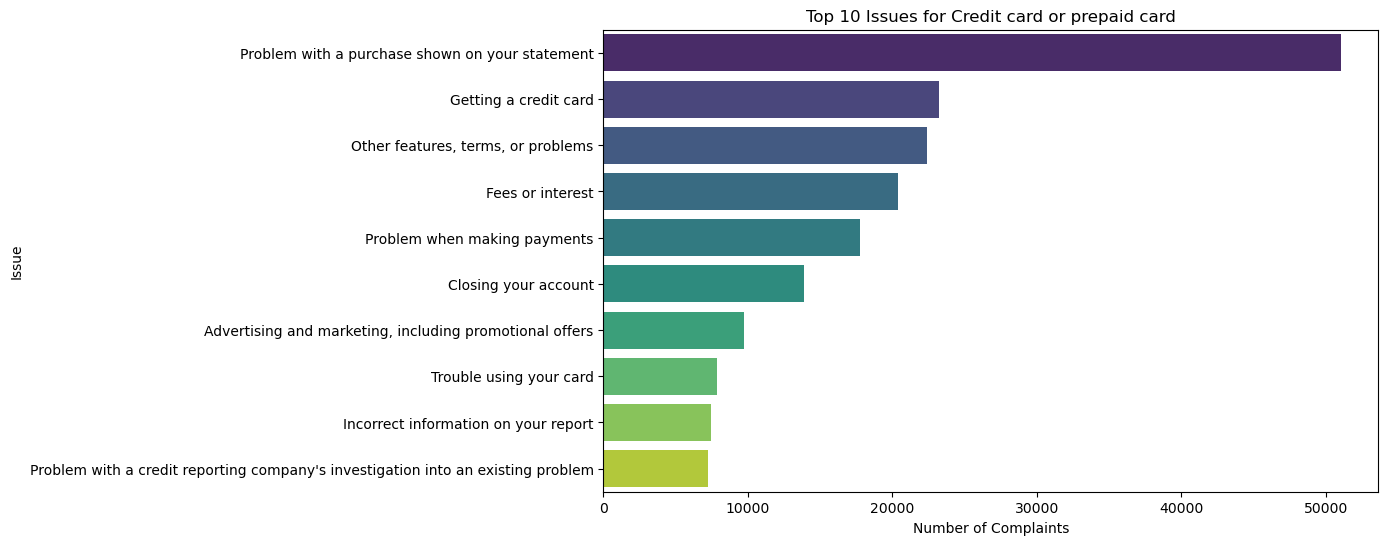

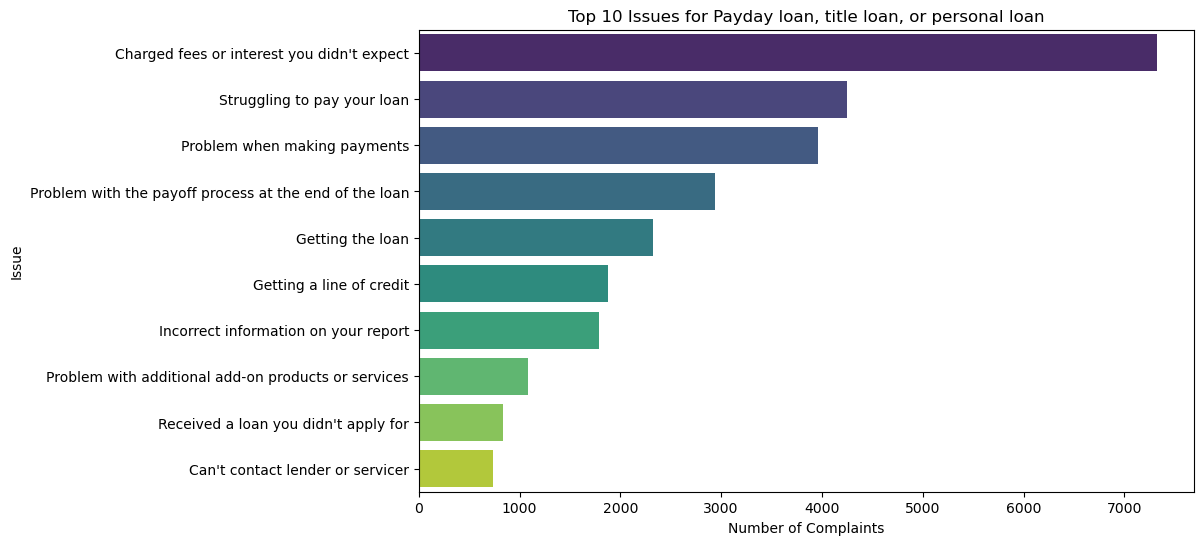

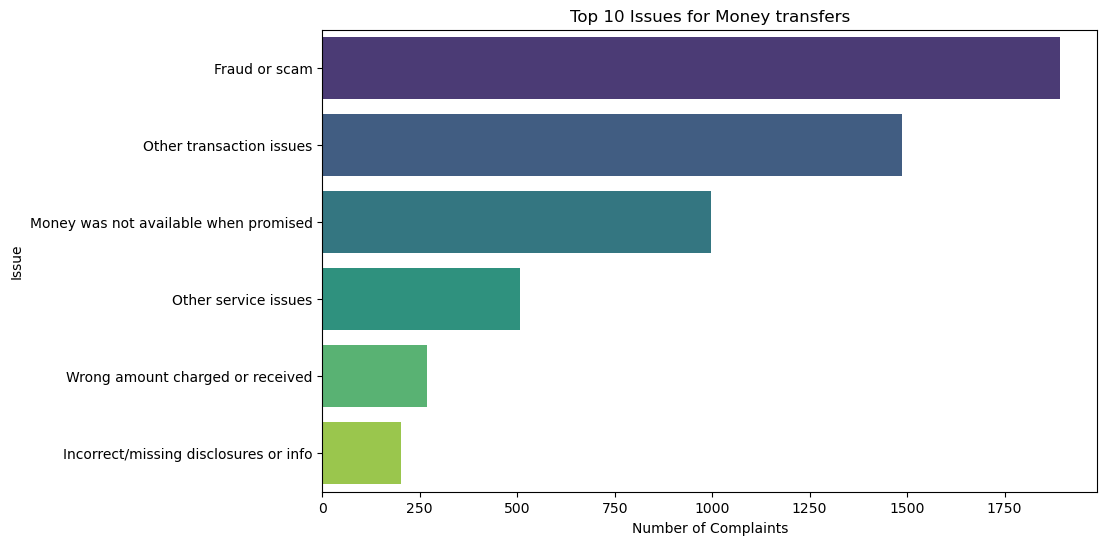

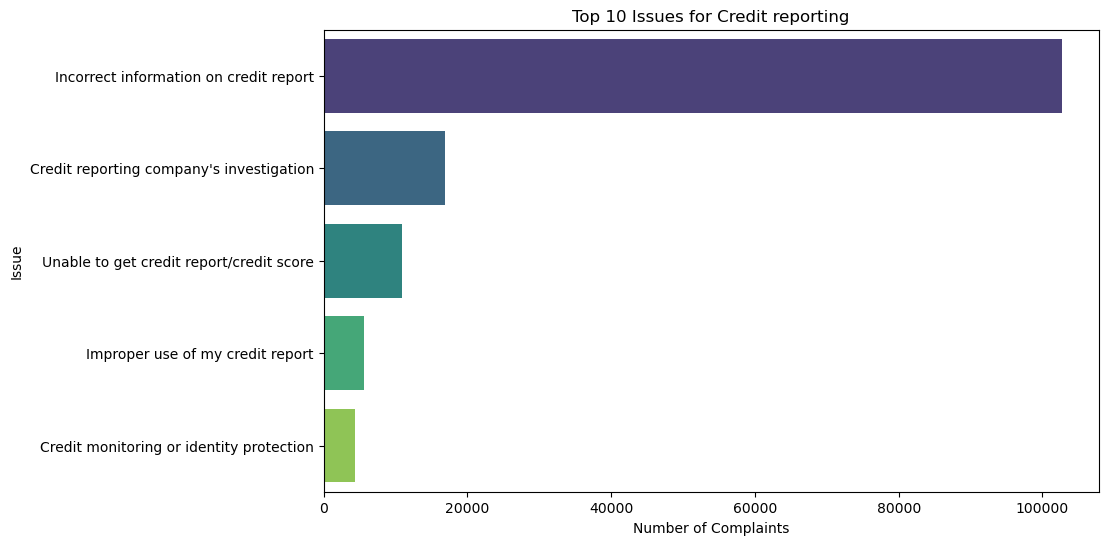

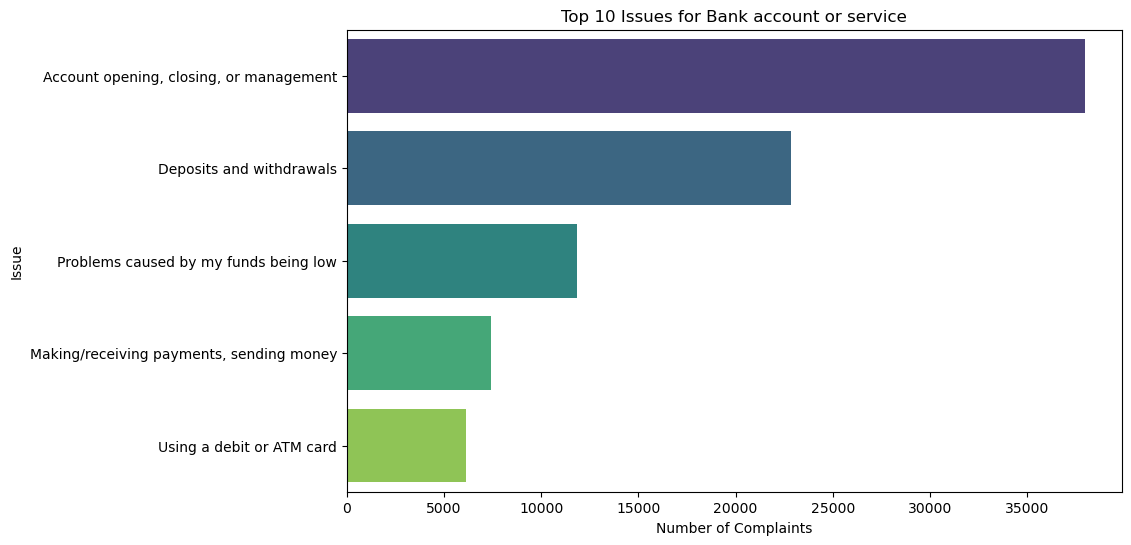

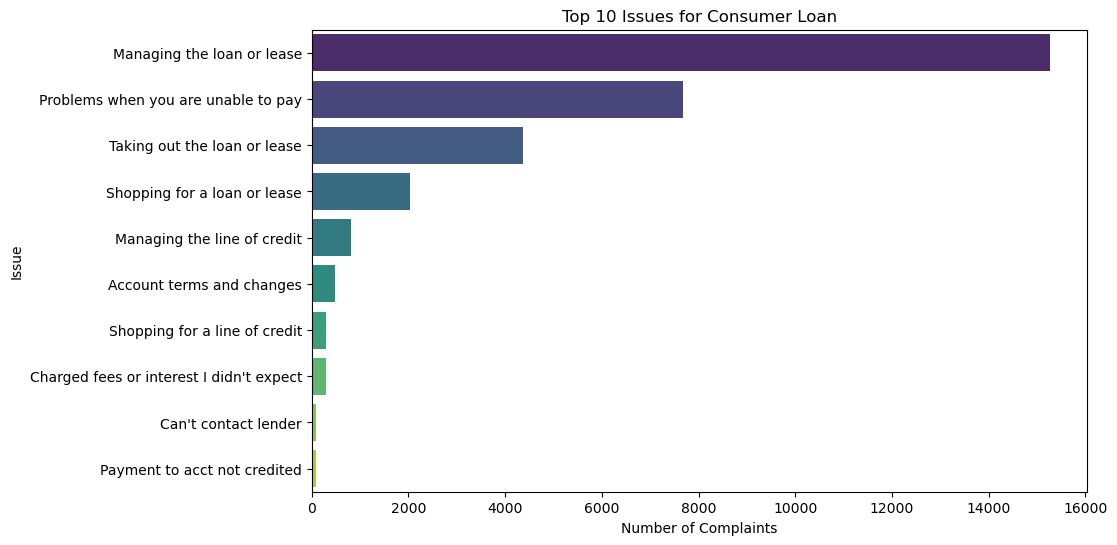

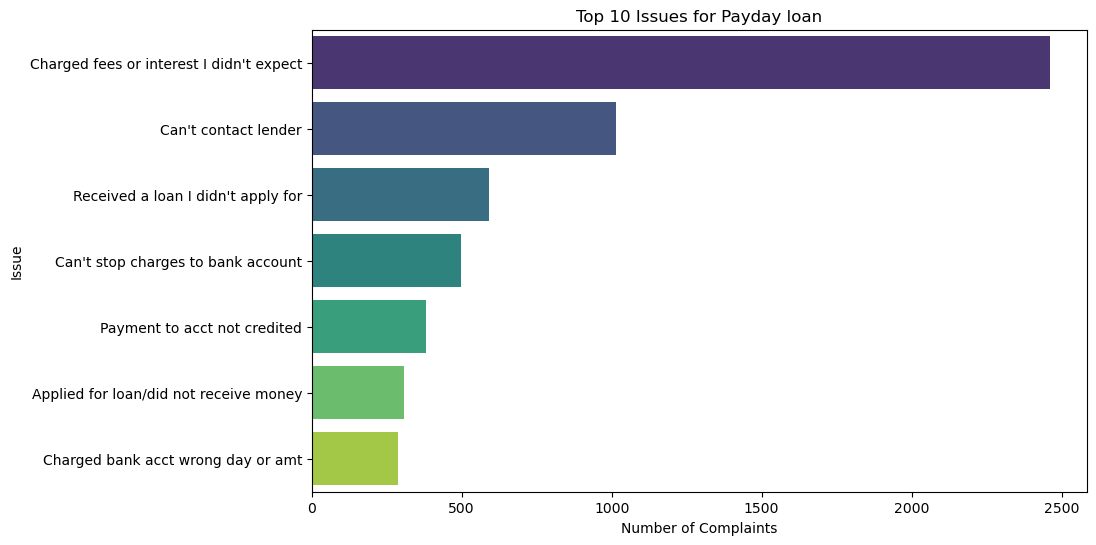

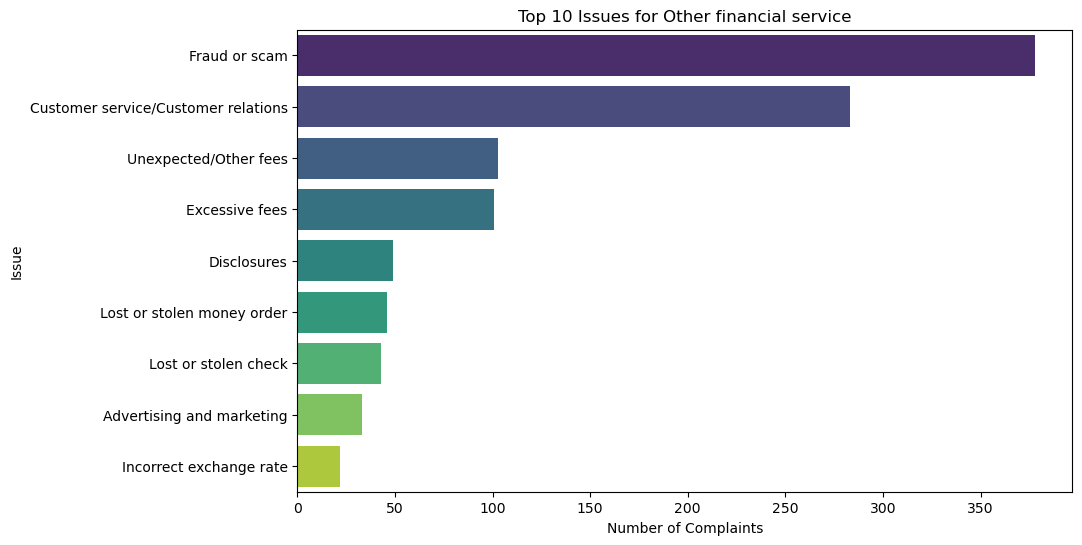

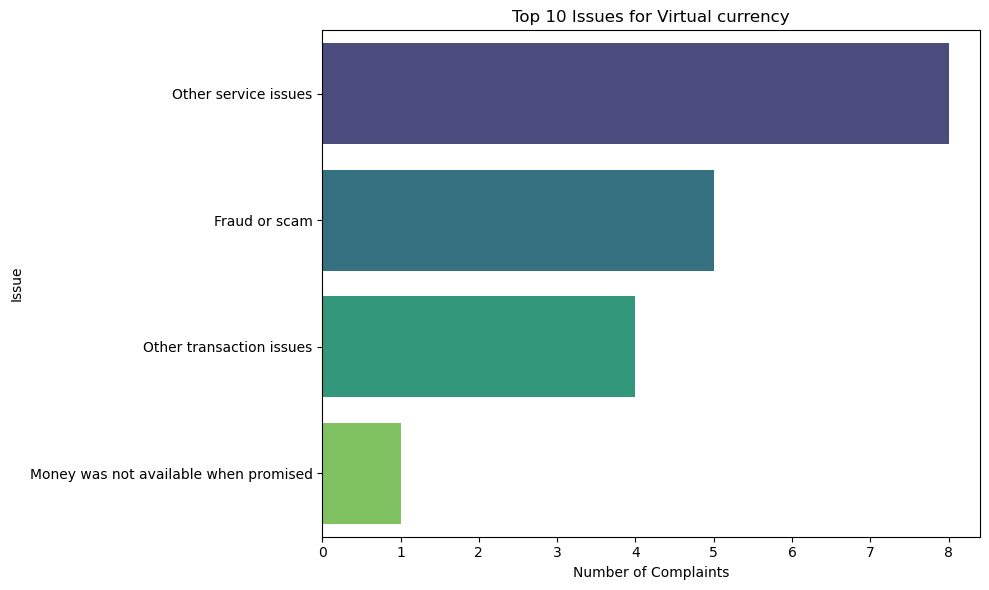

In [24]:
# list of unique product categories
unique_products = df_1['Product'].unique()

# Iterate through each product category
for product in unique_products:
    product_df = df_1[df_1['Product'] == product]
    
    # Calculate the top 10 issues for the current product category
    top_issues = product_df['Issue'].value_counts().head(10)
    
    # Plot the top 10 issues for the current product category
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_issues.values, y=top_issues.index, palette='viridis')
    plt.xlabel('Number of Complaints')
    plt.ylabel('Issue')
    plt.title('Top 10 Issues for {}'.format(product))
    
plt.tight_layout()
plt.show();

# Top products  vs Company public respondse:

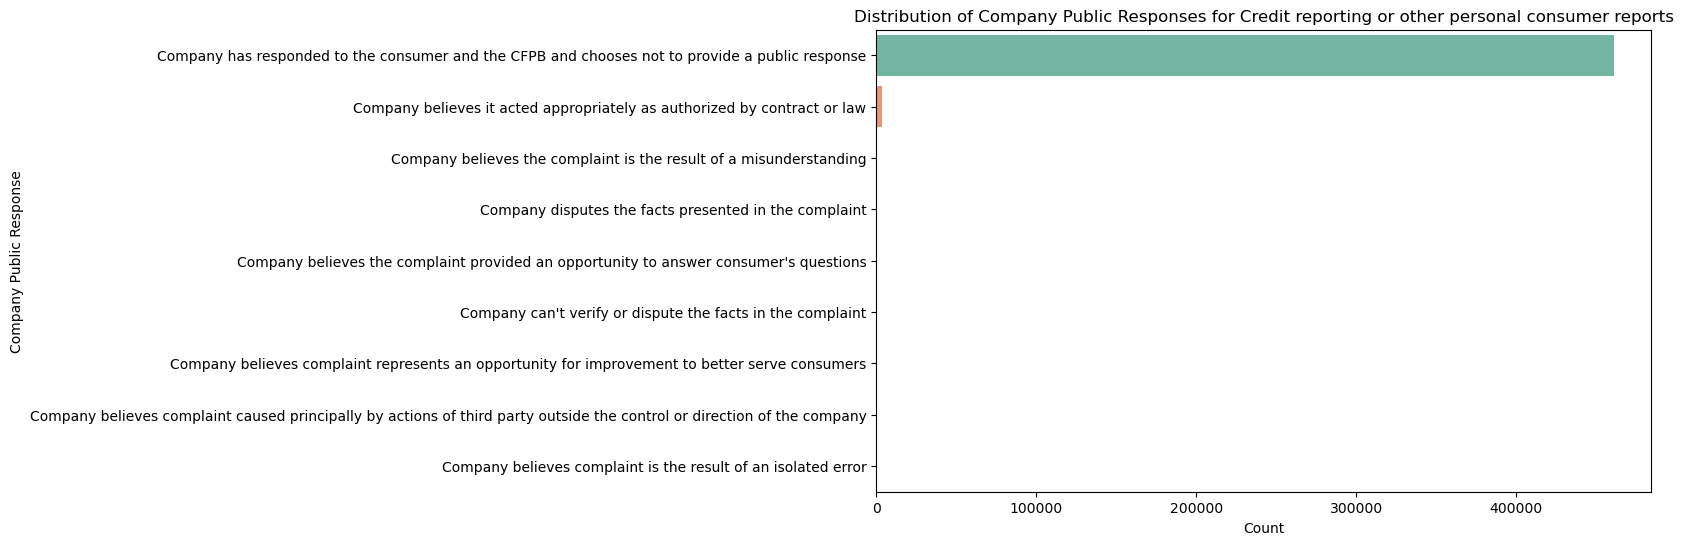

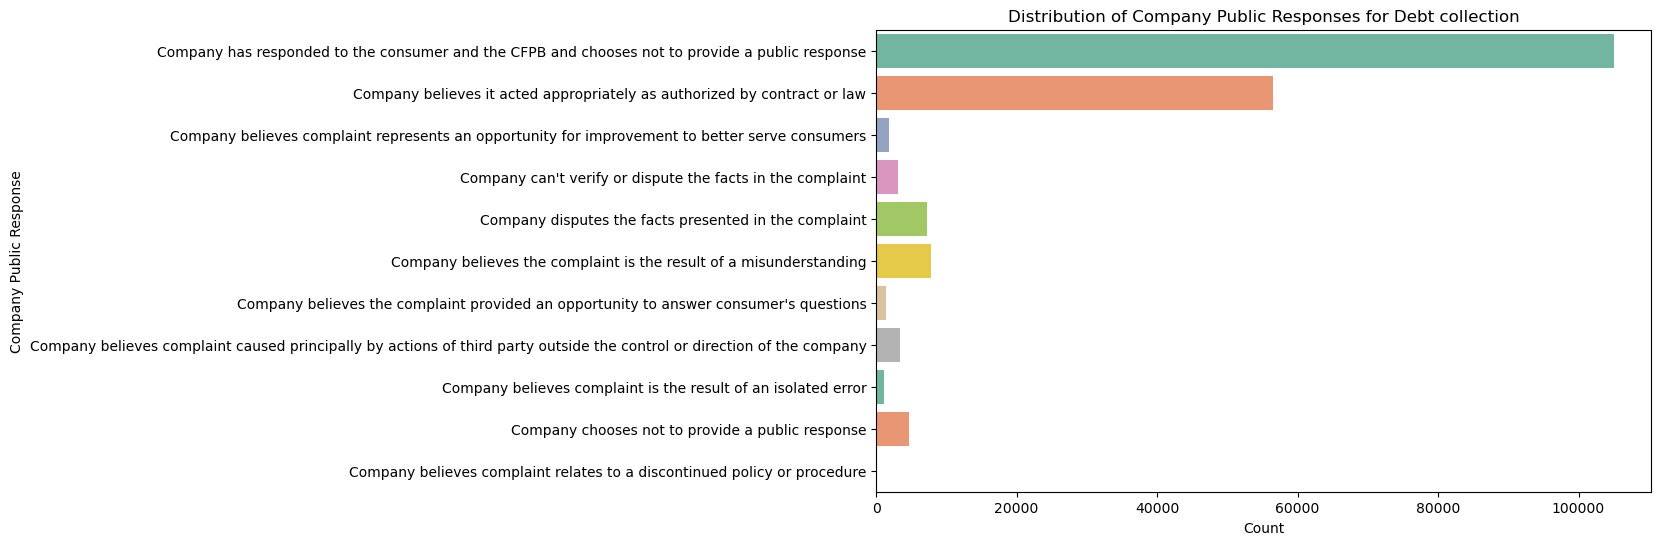

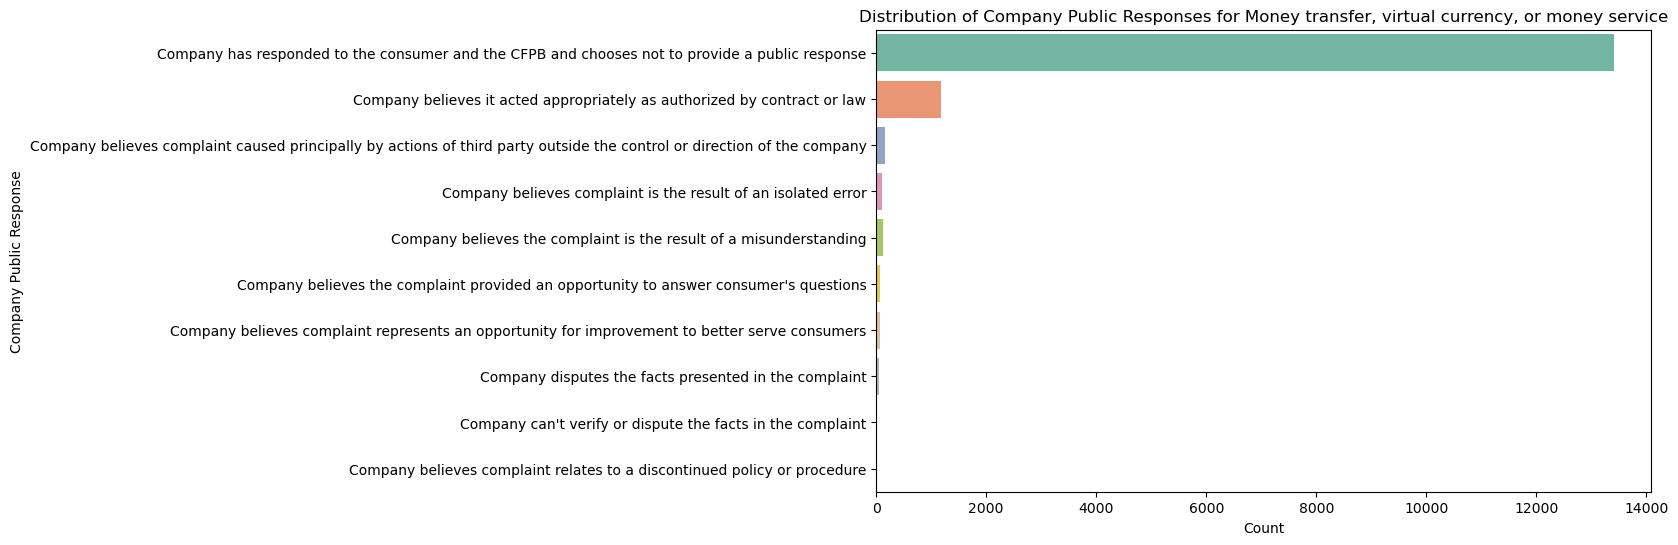

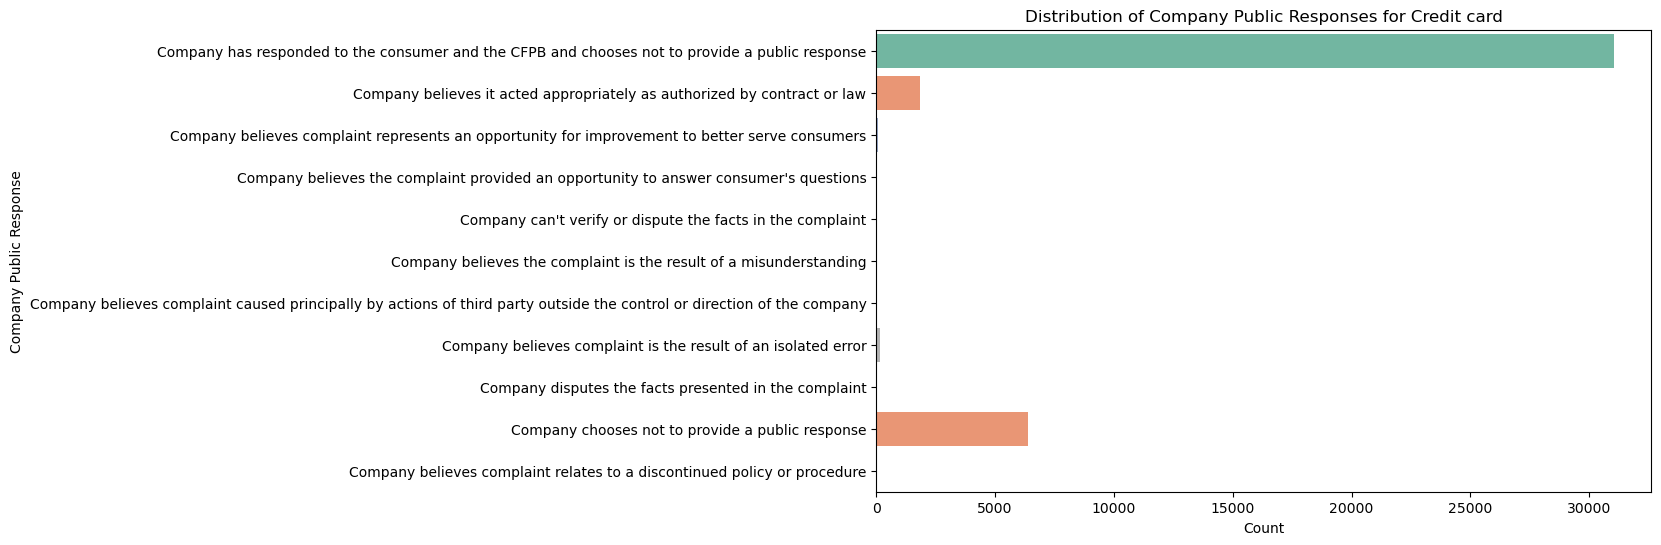

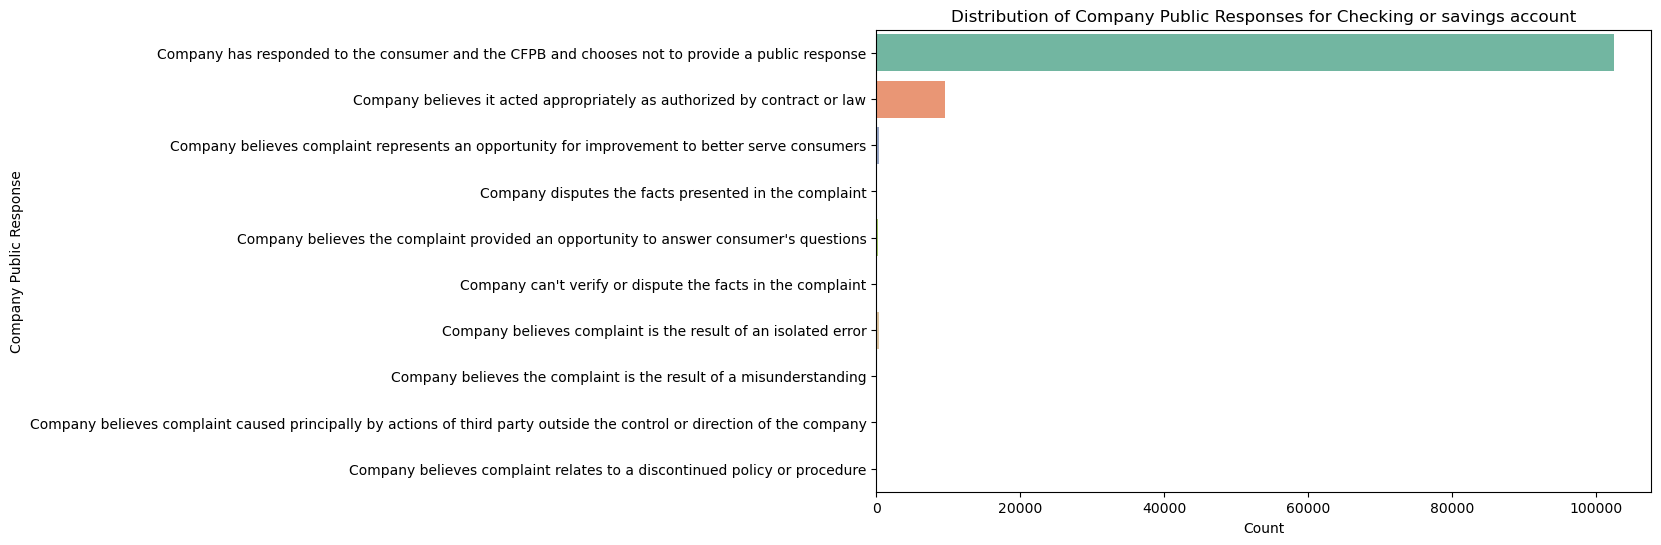

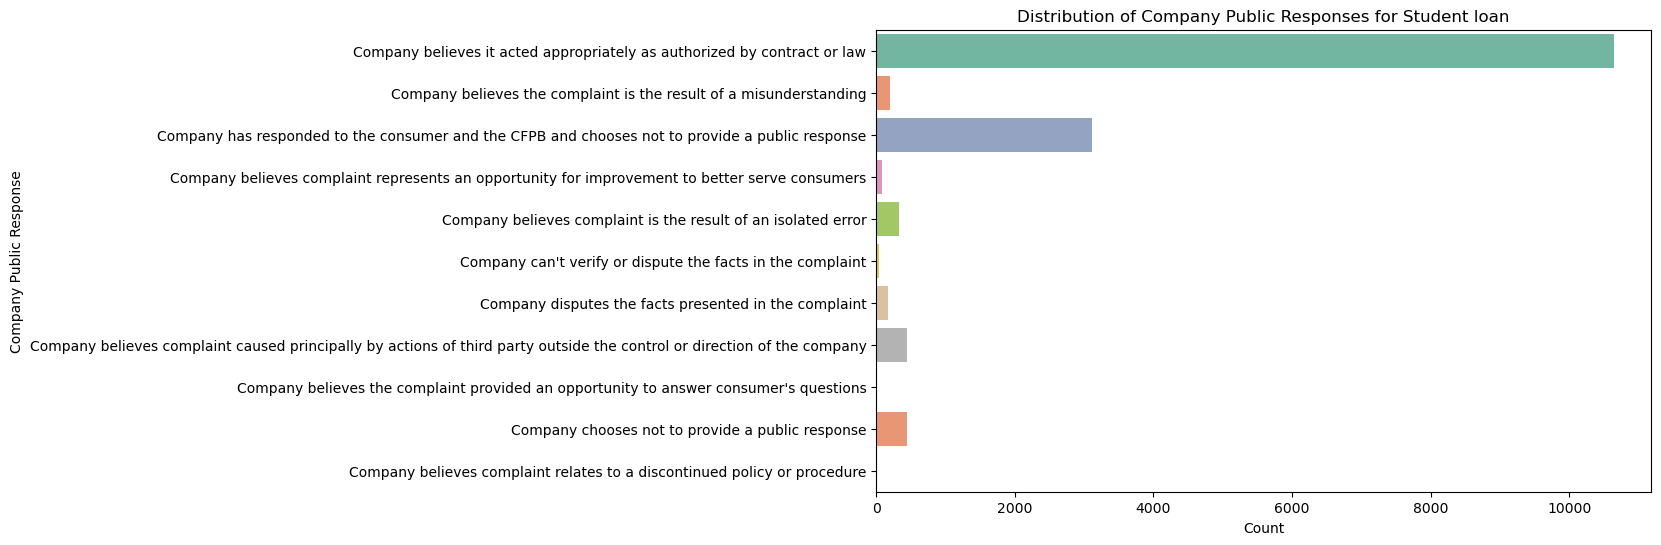

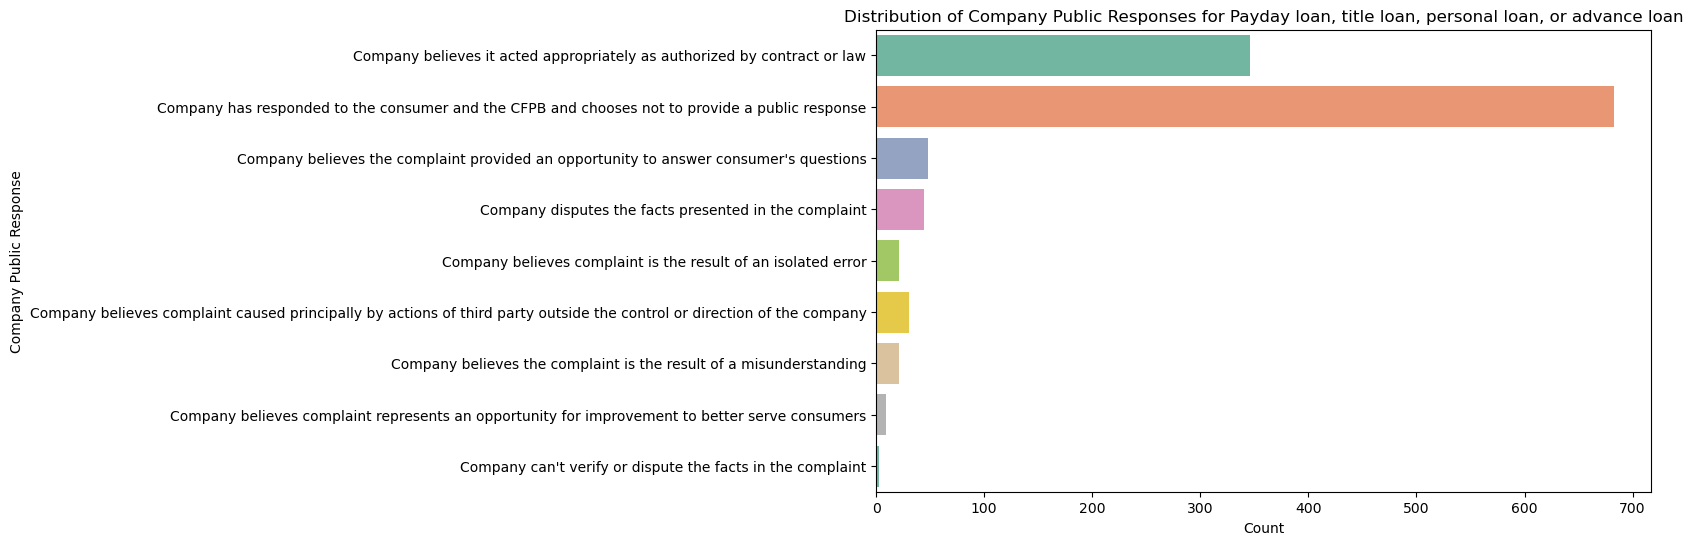

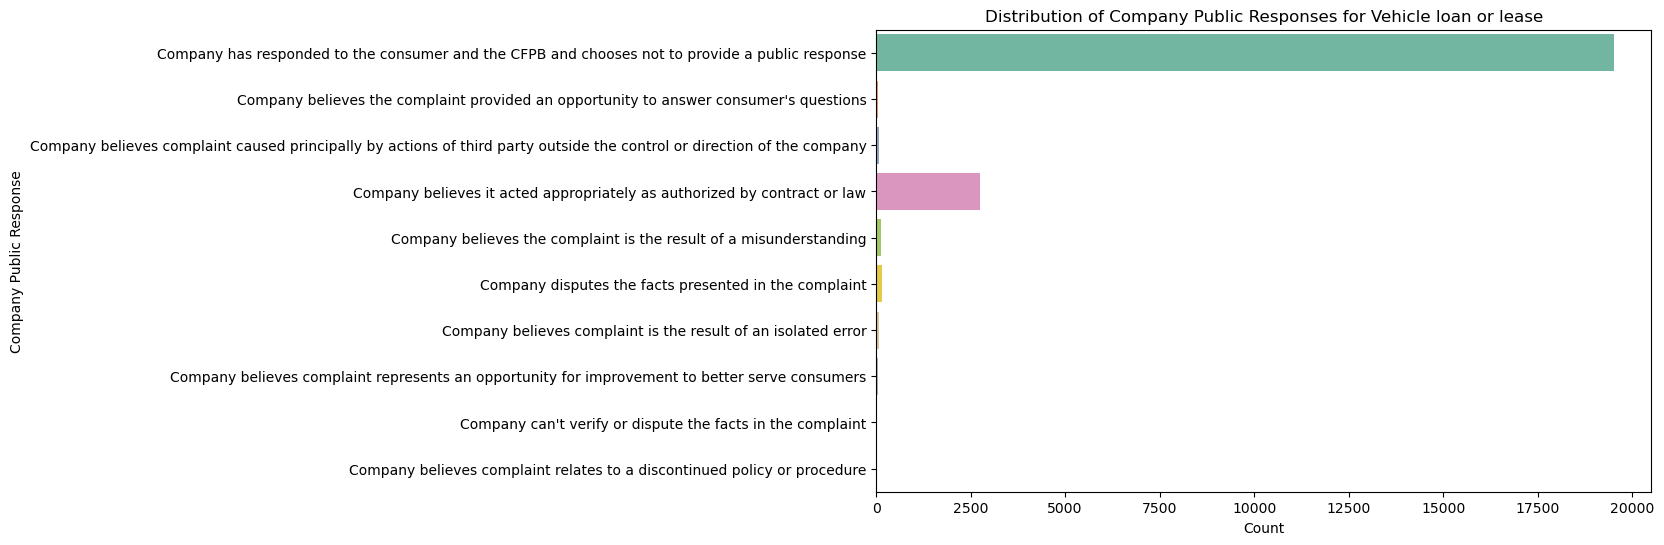

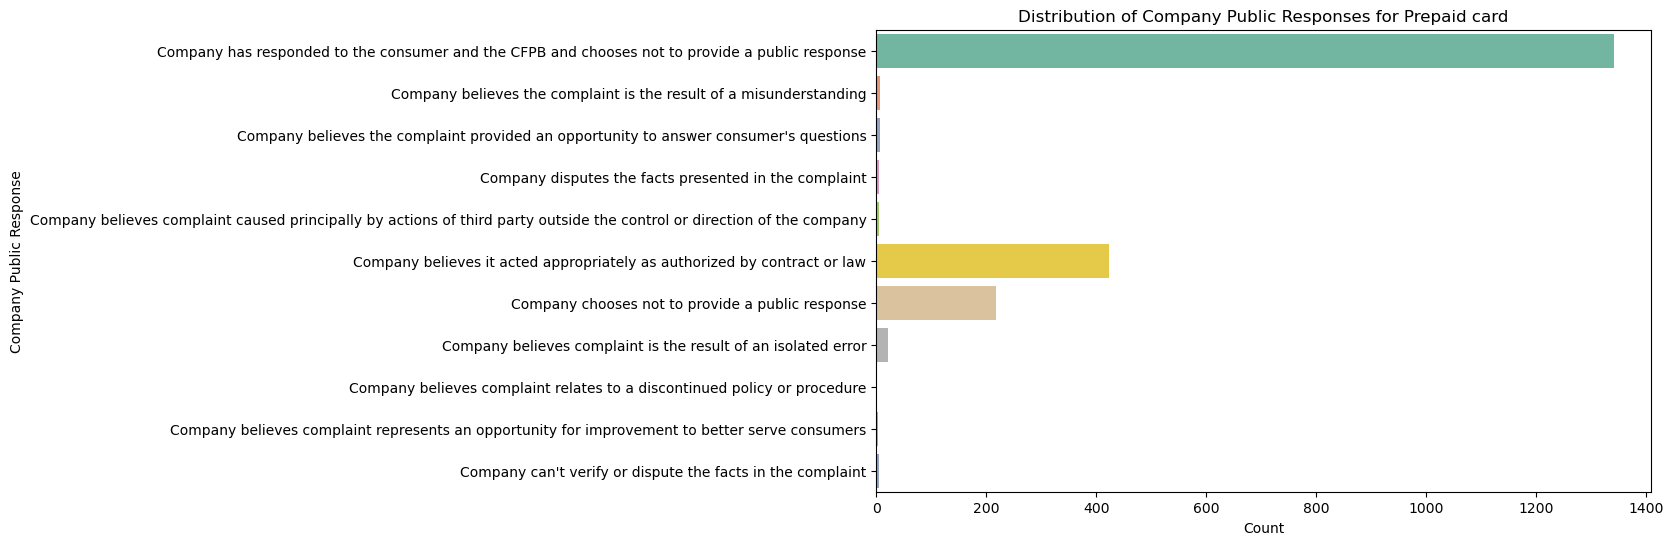

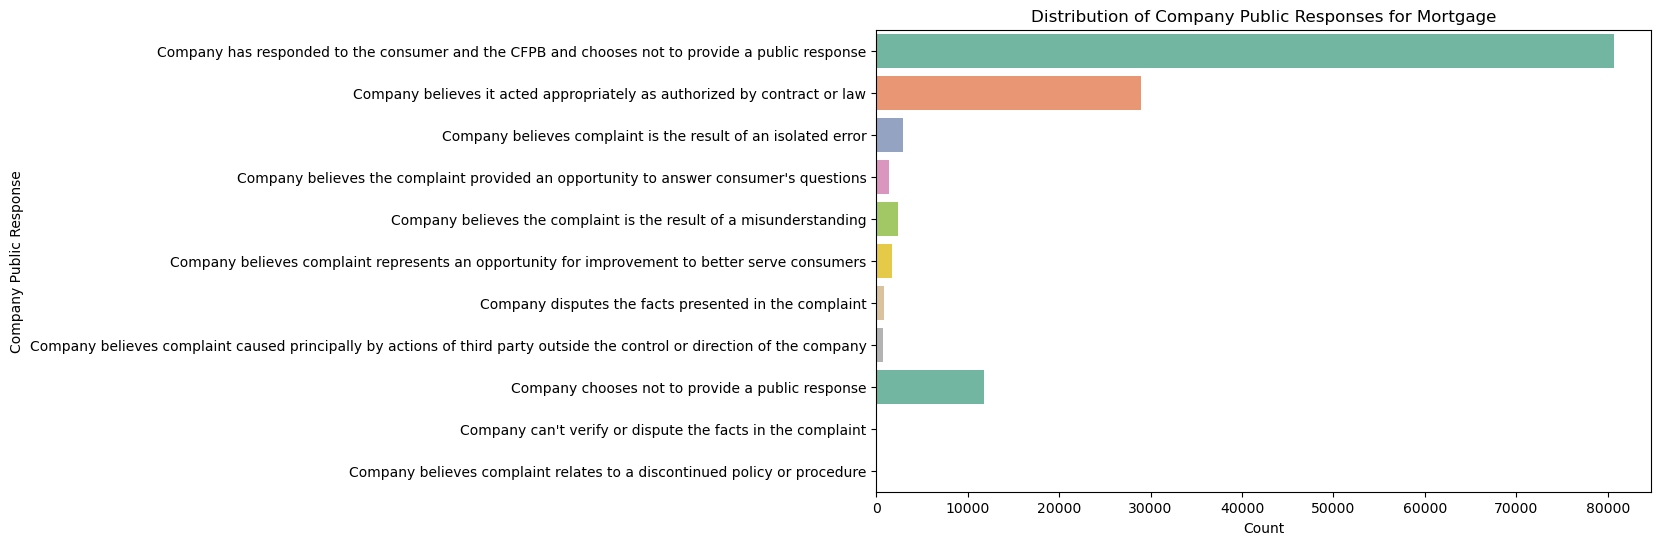

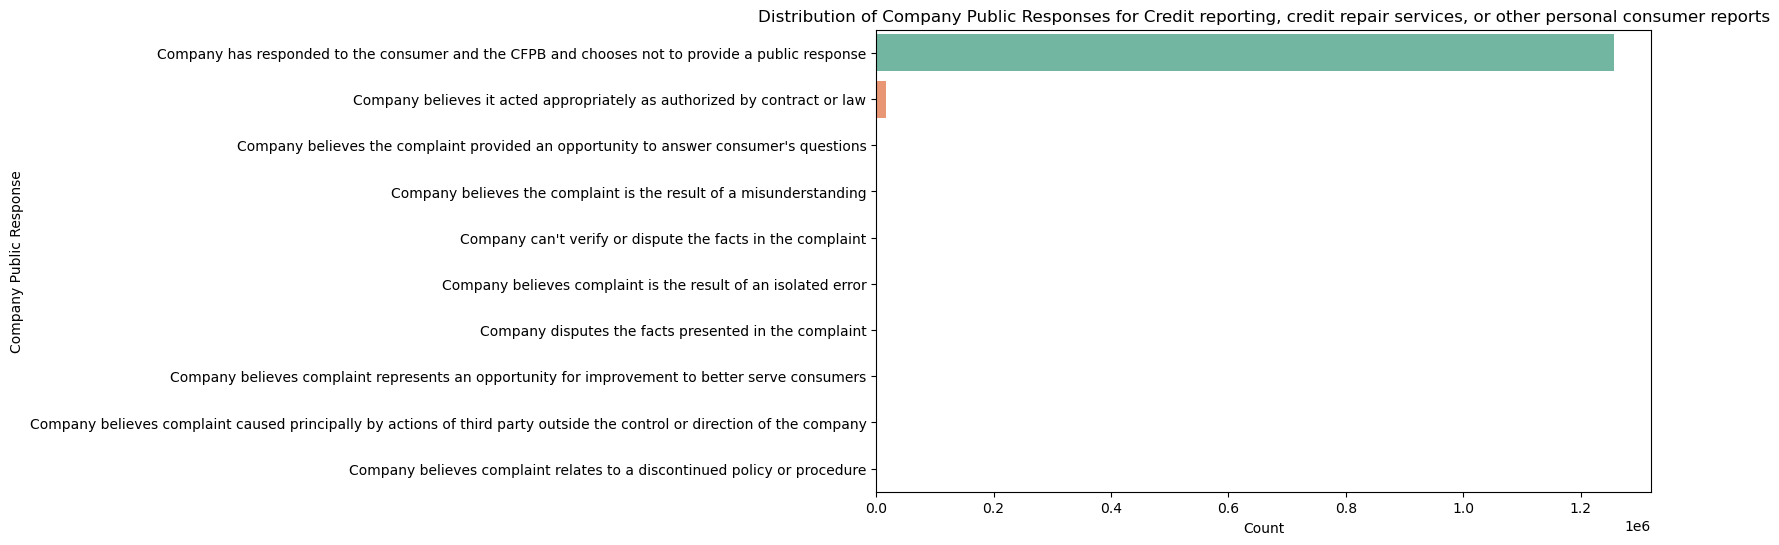

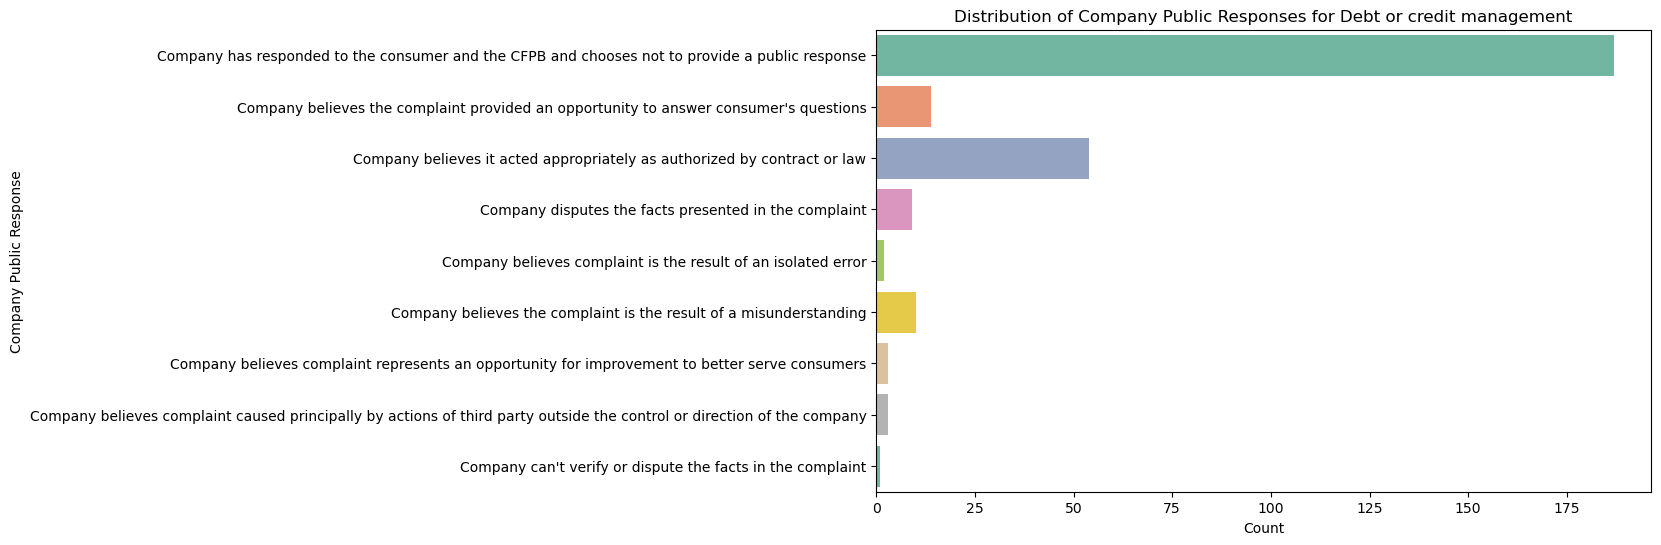

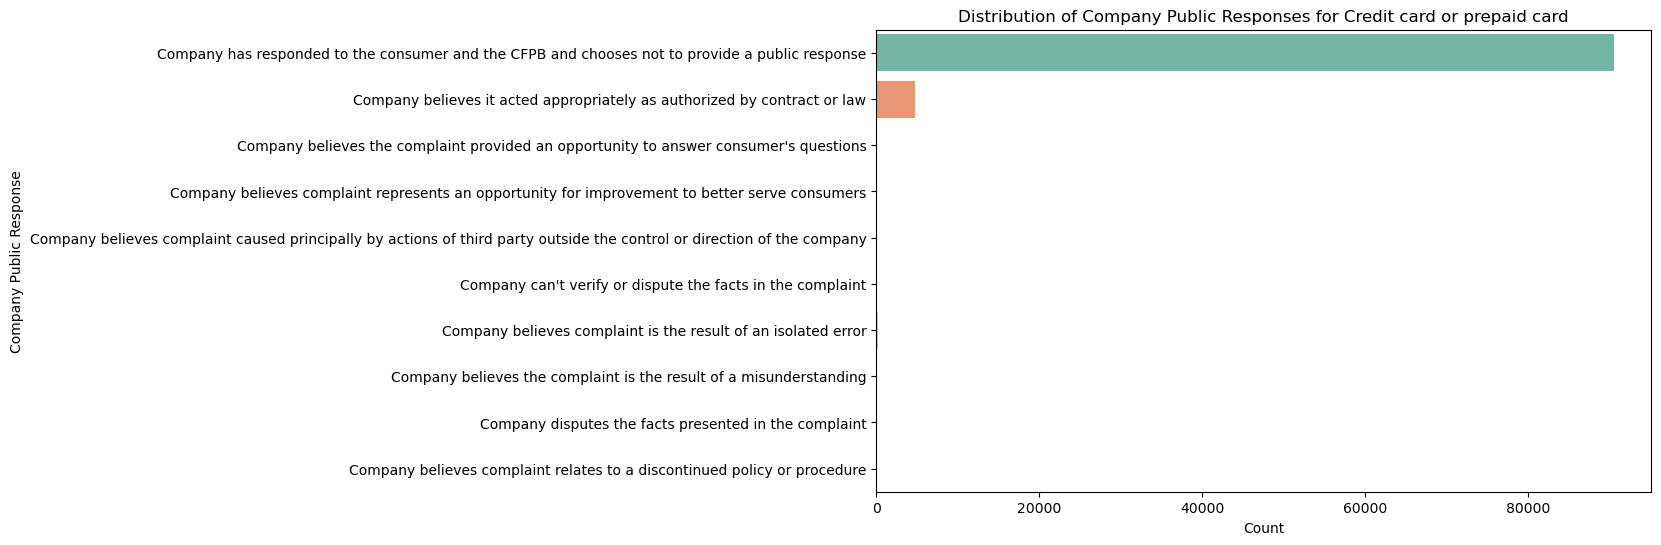

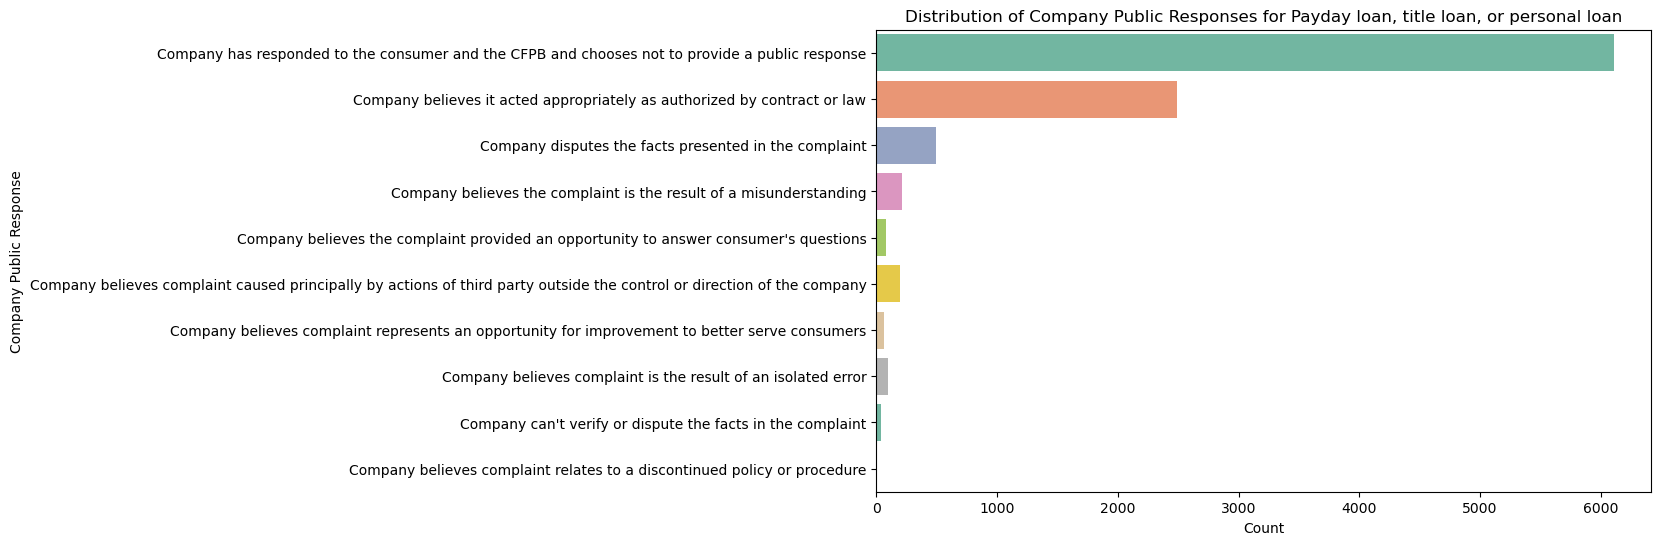

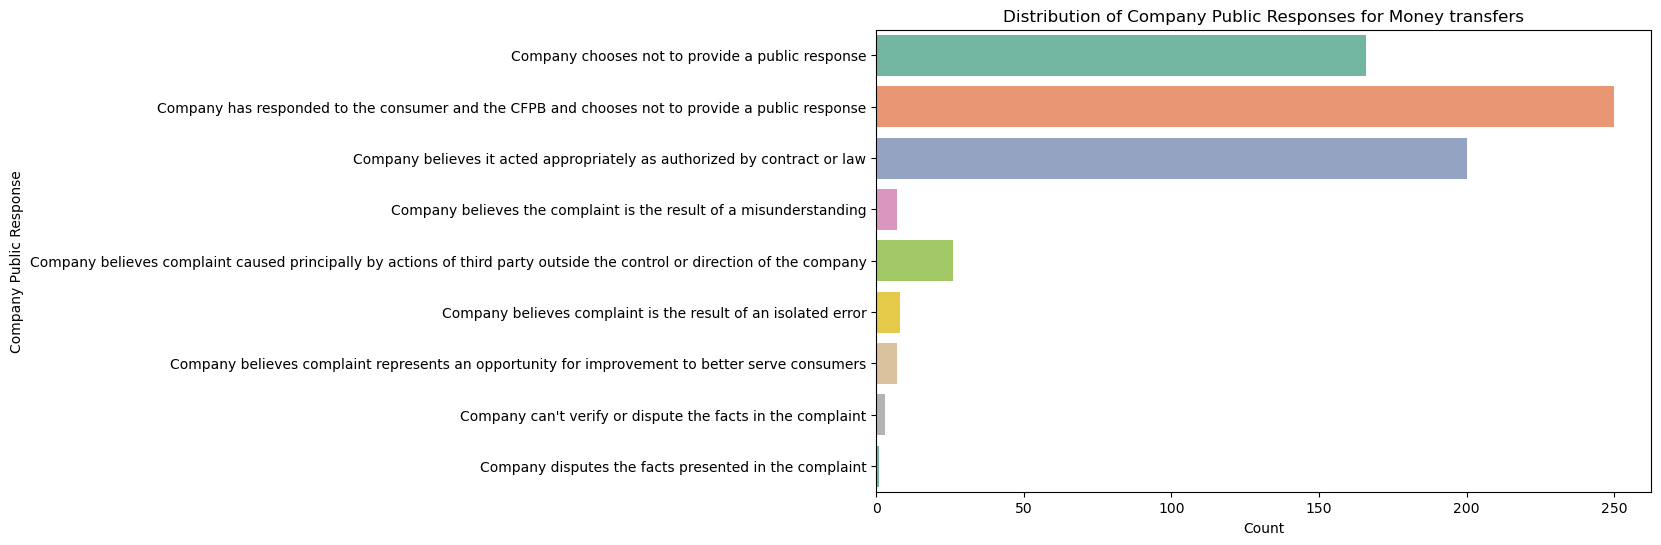

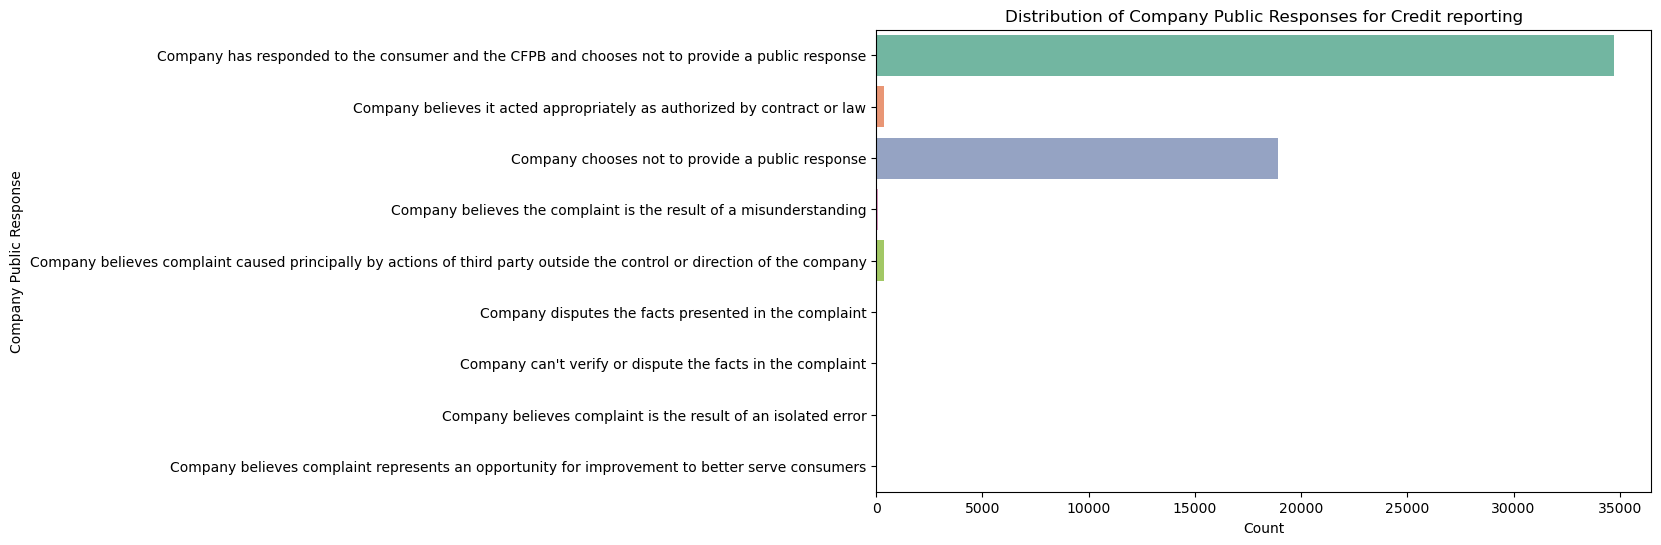

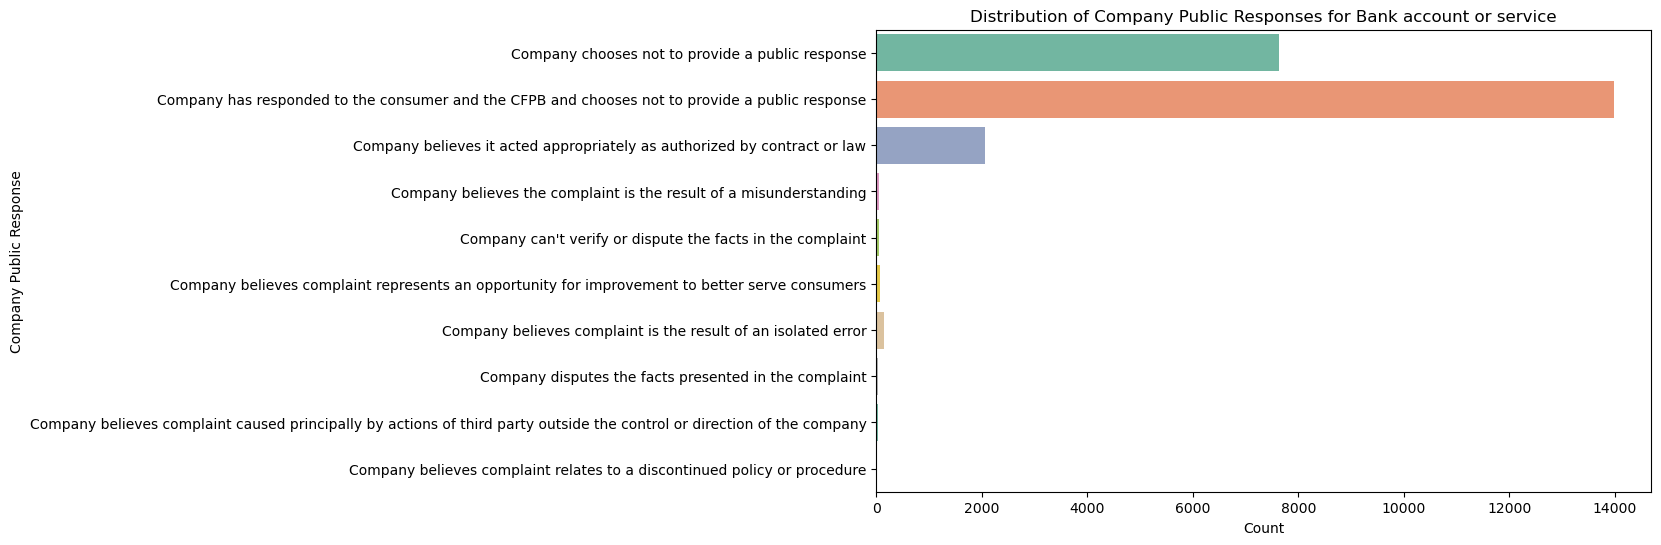

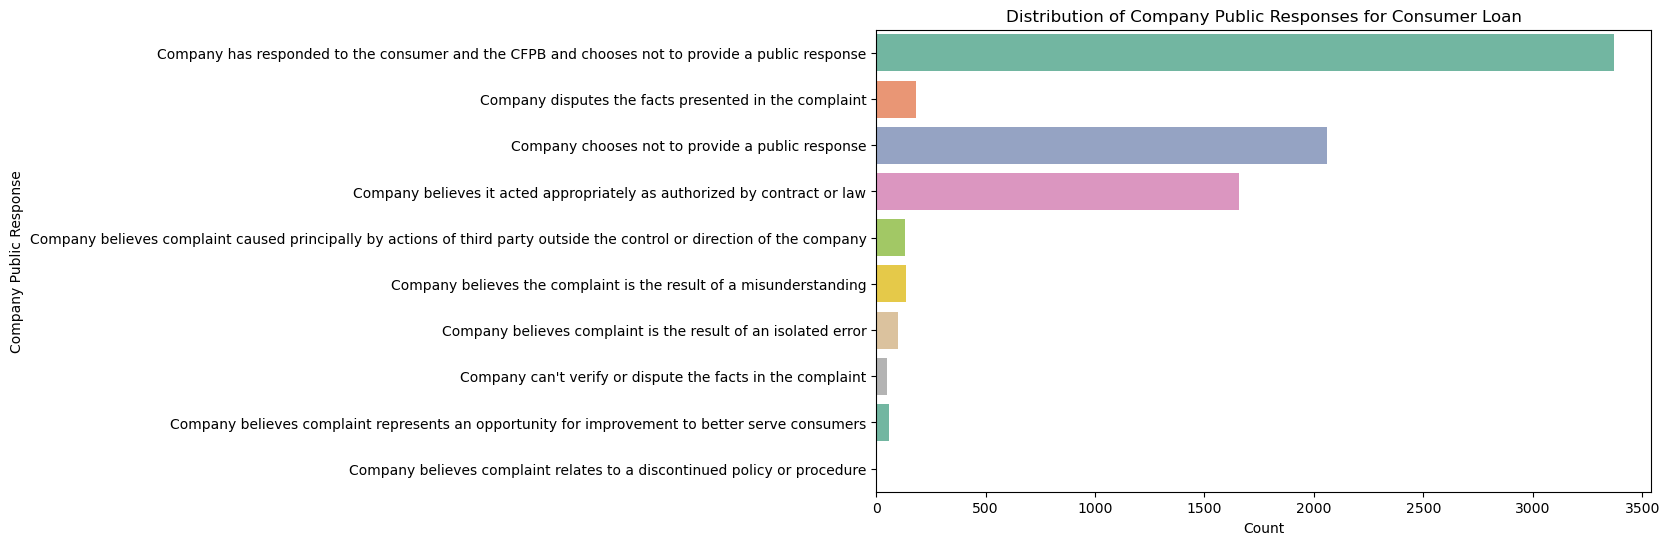

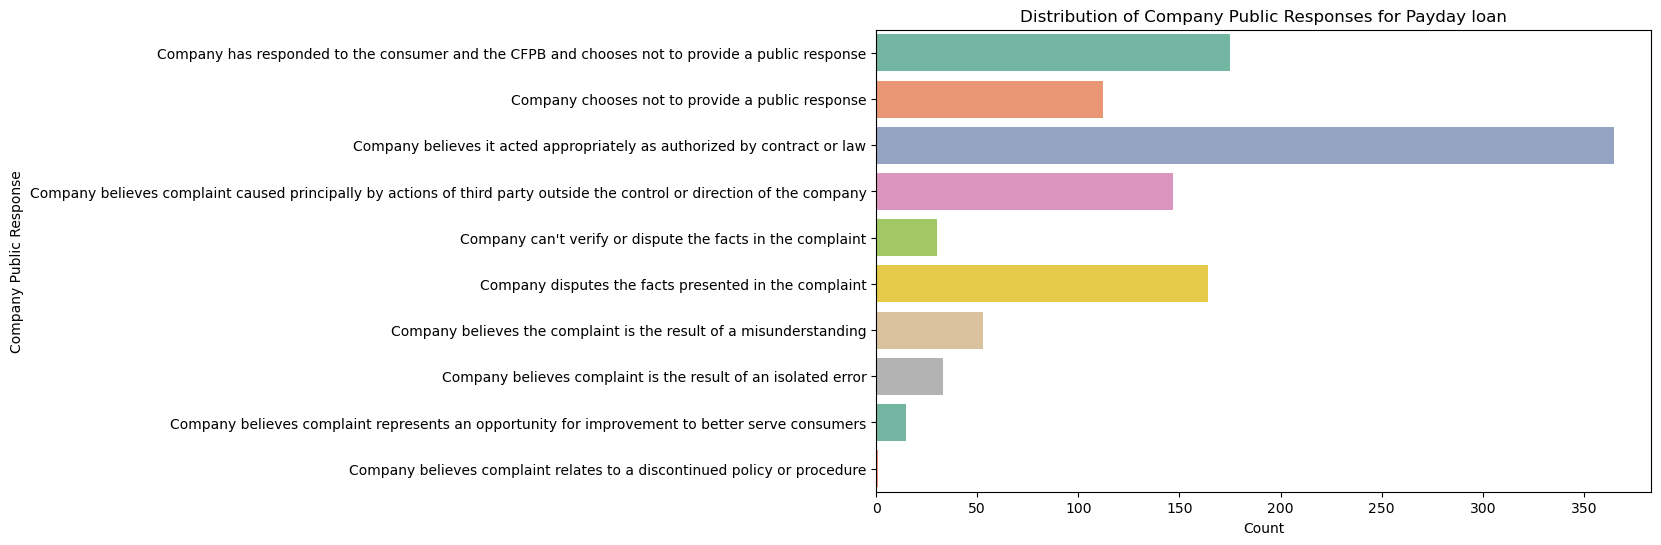

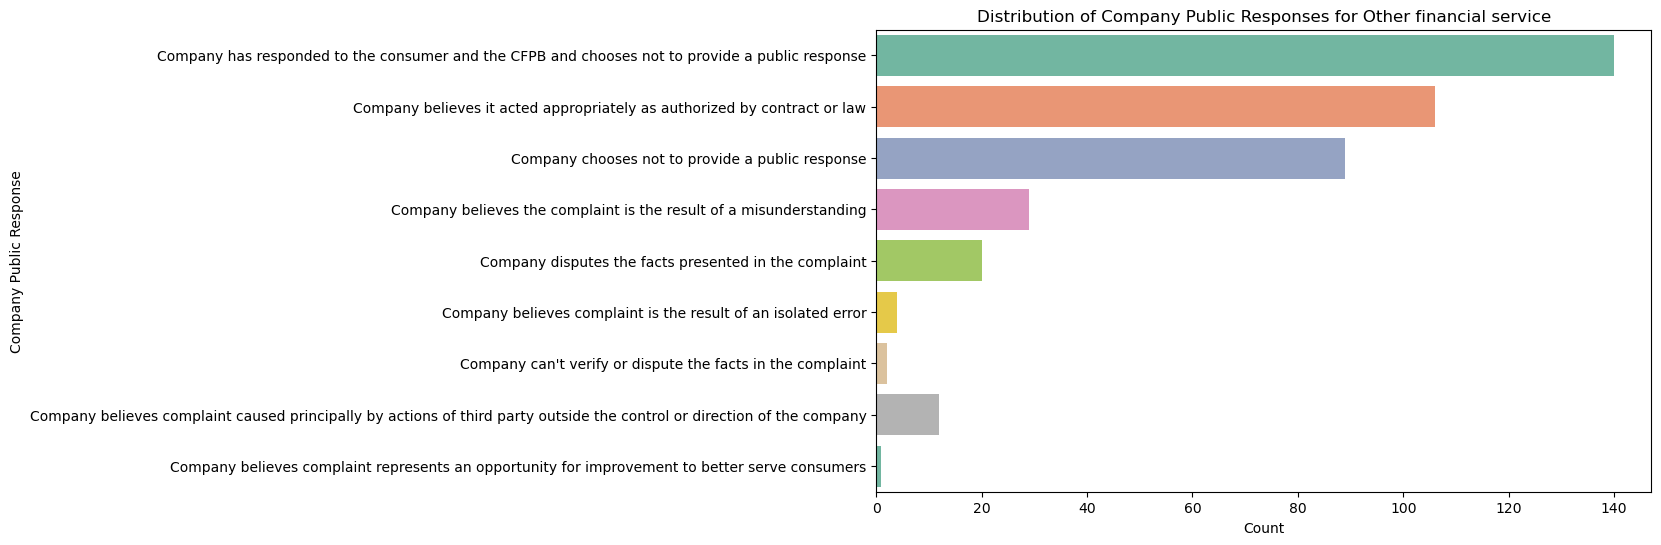

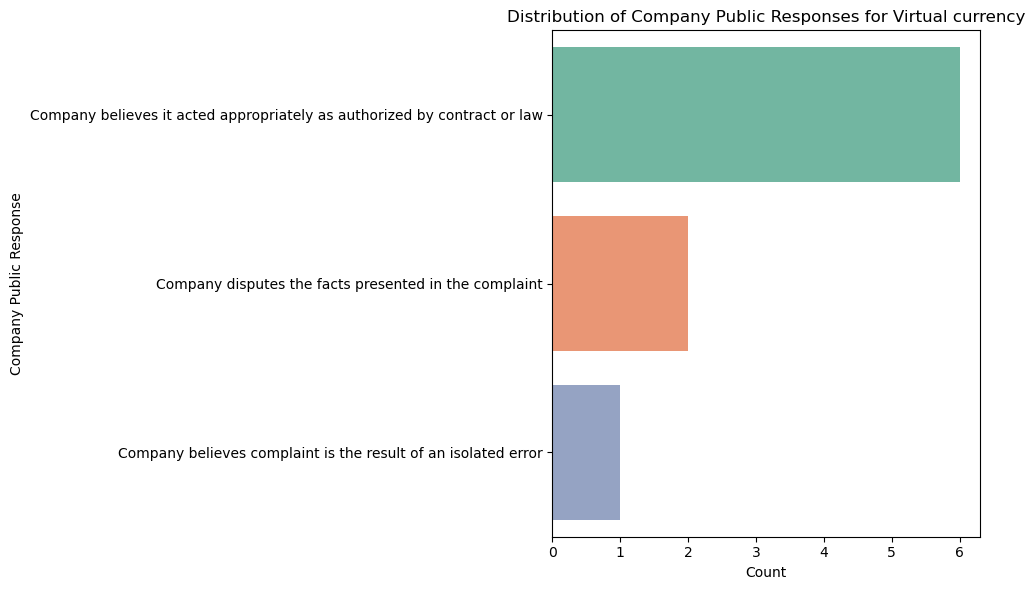

In [25]:
# Unique product categories
unique_products = df_1['Product'].unique()

for product in unique_products:
    # Filter the DataFrame for the current product category
    product_df = df_1[df_1['Product'] == product]
    
    # Plot the  company public responses for the current product category
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Company public response', data=product_df, palette='Set2')
    plt.xlabel('Count')
    plt.ylabel('Company Public Response')
    plt.title('Distribution of Company Public Responses for {}'.format(product))
    
plt.tight_layout()
plt.show();


# Top 10 products vs Company response to consumer:

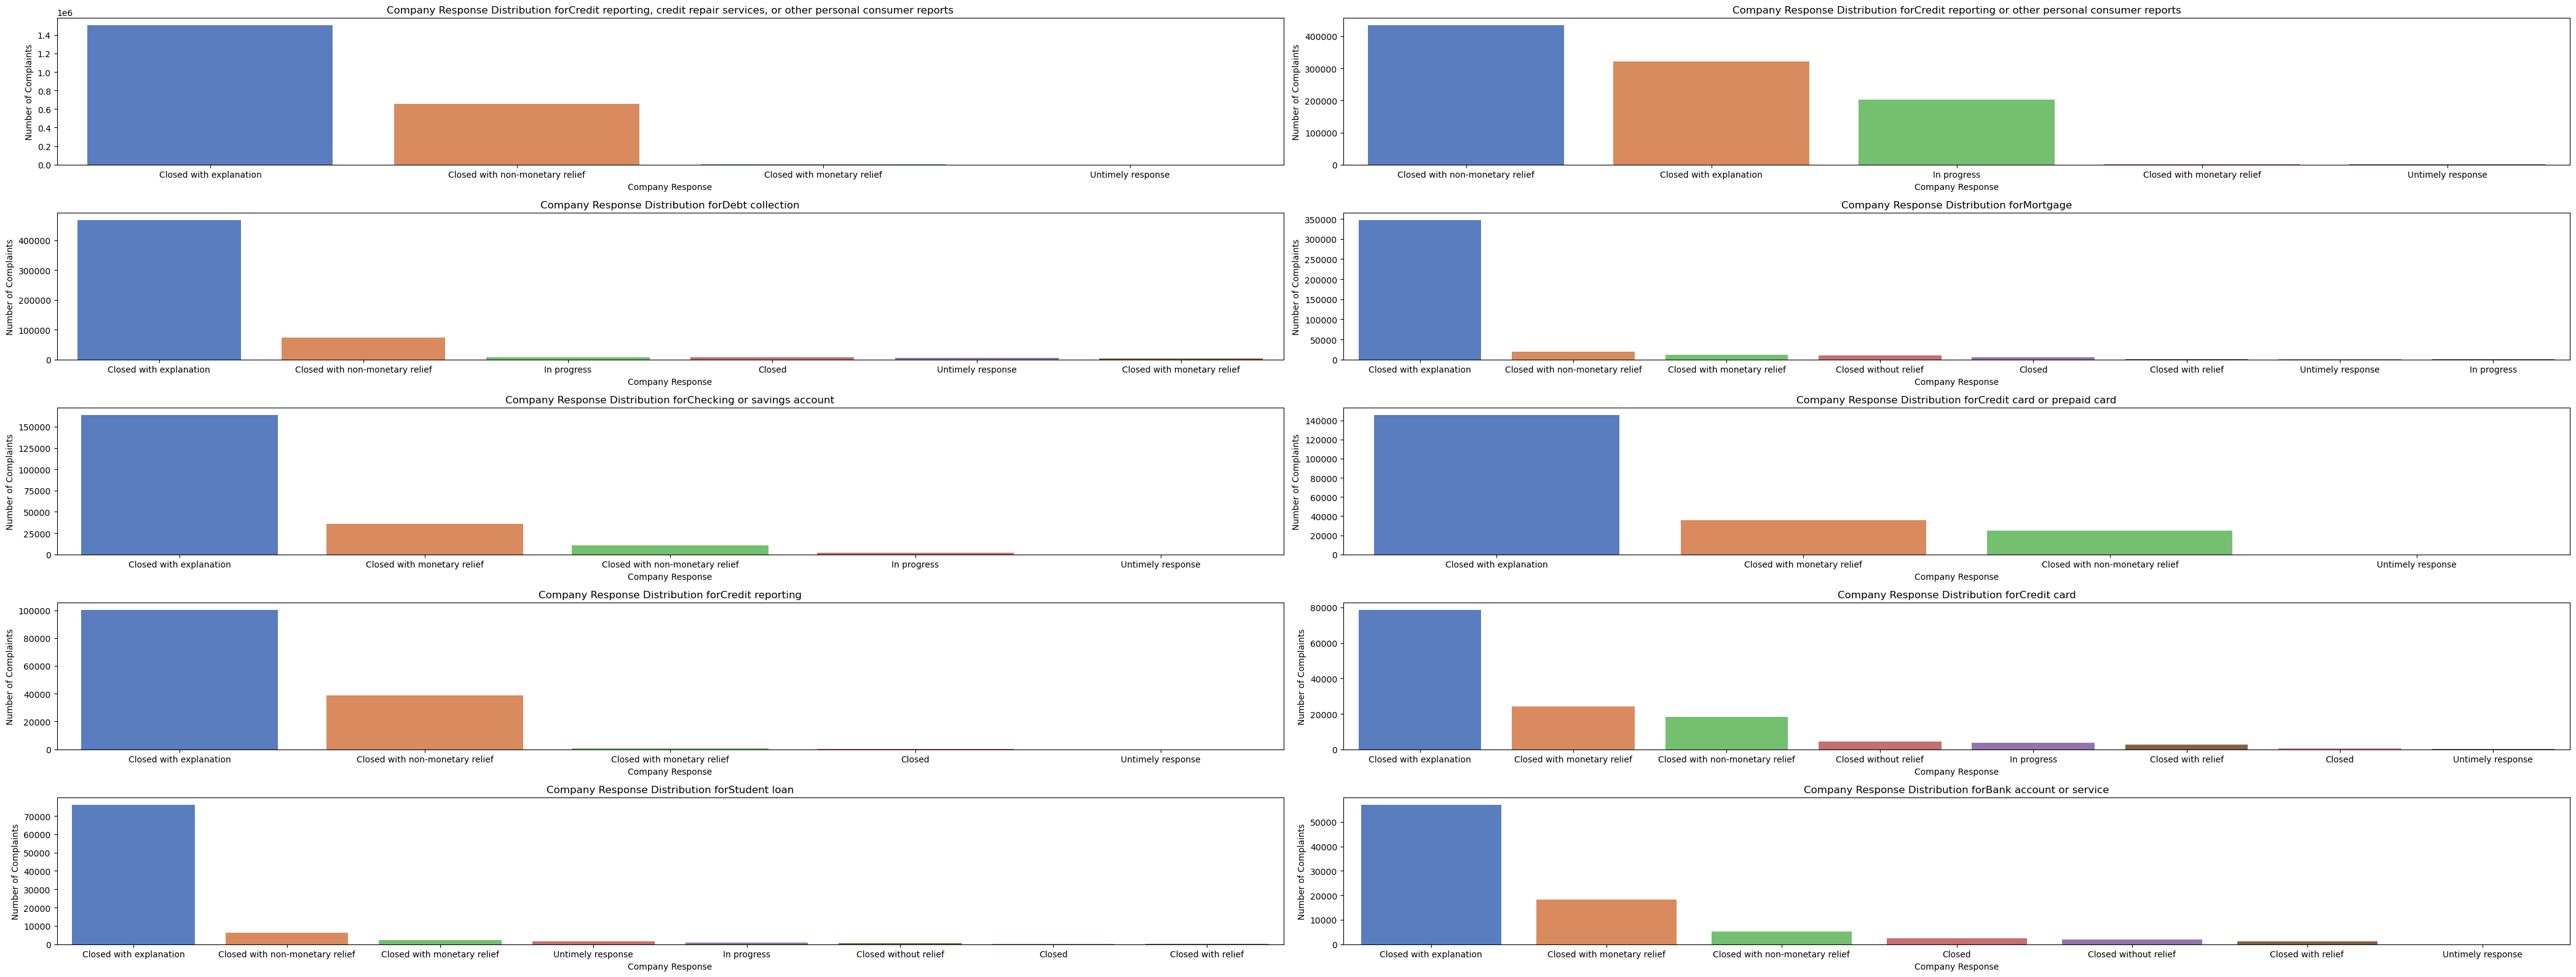

In [26]:
# Step 1: Identify the top products based on the number of complaints
top_products = df_1['Product'].value_counts().head(10).index.tolist()

# Step 2: For each of the top products, determine the distribution of company responses
product_company_response = {}

for product in top_products:
    product_df = df_1[df_1['Product'] == product]
    company_response_counts = product_df['Company response to consumer'].value_counts()
    product_company_response[product] = company_response_counts

# Step 3: Visualize the distribution of company responses for each of the top products
plt.figure(figsize=(42, 16))

for i, product in enumerate(top_products, start=1):
    plt.subplot(5, 2, i)
    sns.barplot(x=product_company_response[product].index, y=product_company_response[product].values, palette='muted')
    plt.title('Company Response Distribution for{}'.format(product))
    plt.xlabel('Company Response')
    plt.ylabel('Number of Complaints')

plt.tight_layout()
plt.show();


# Top 10 products vs Comapany:

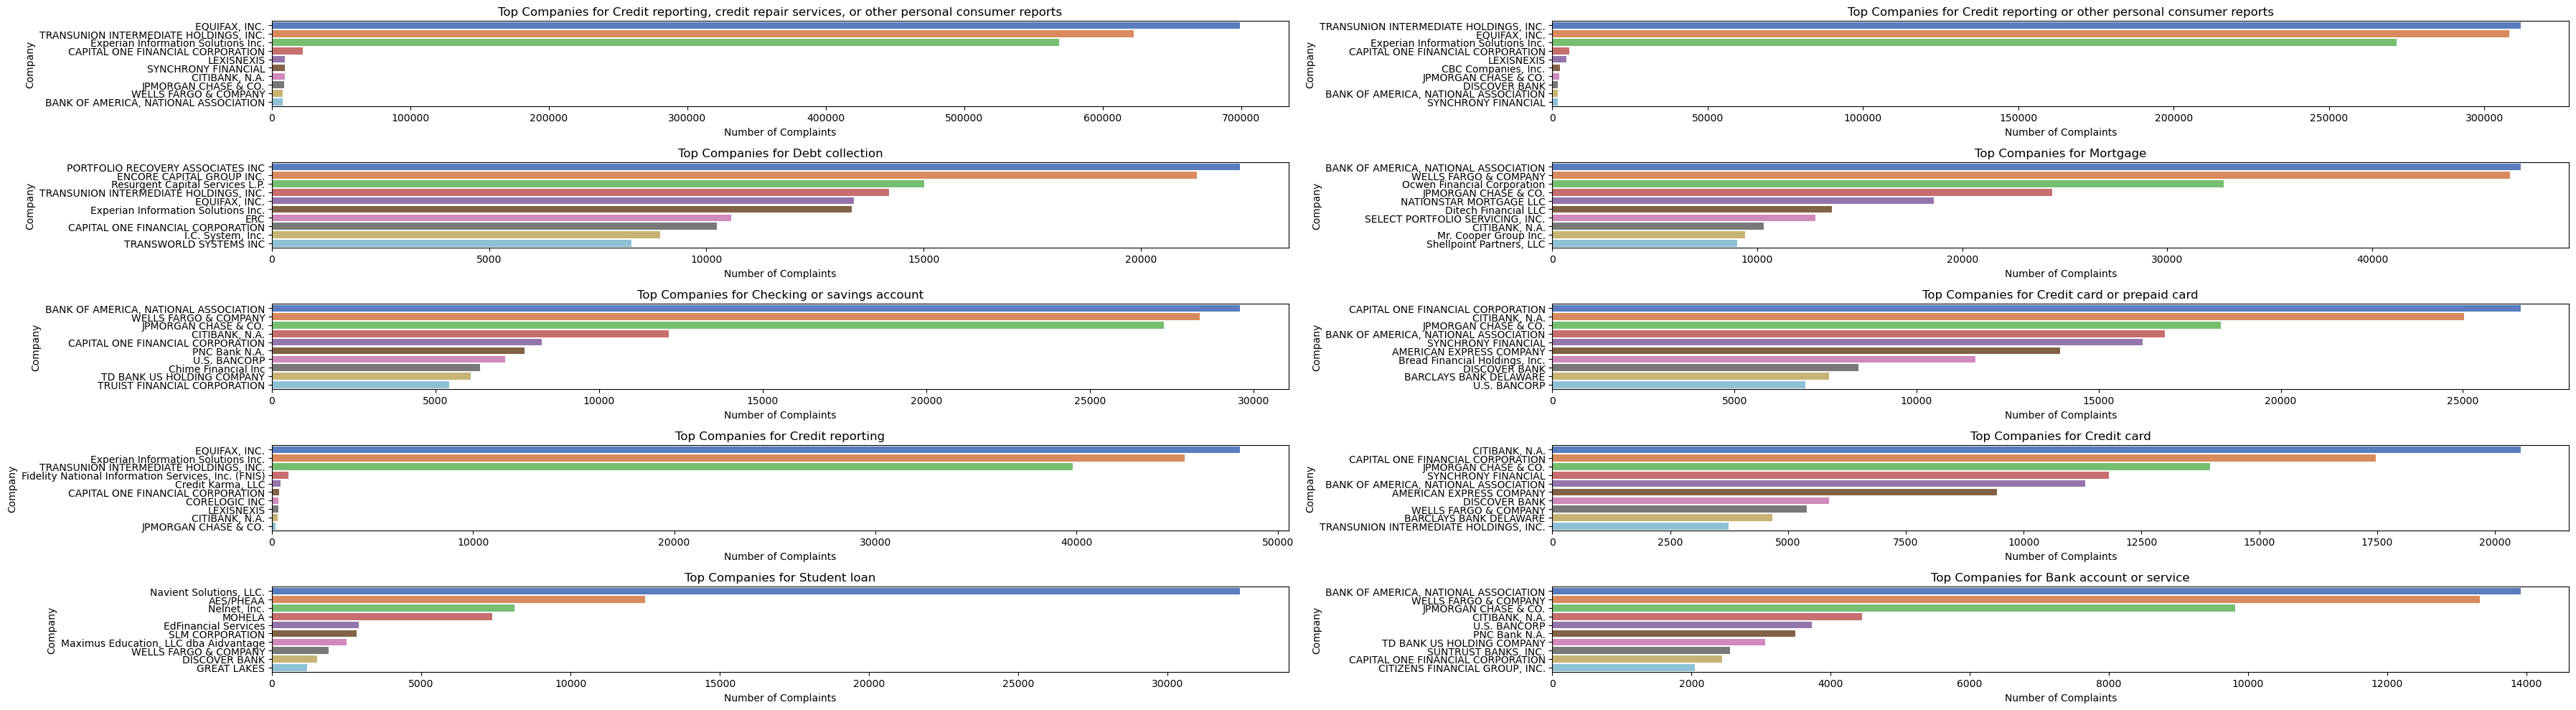

In [27]:
# top 10 products by the number of complaints
top_10_products = df_1['Product'].value_counts().head(10).index.tolist()
top_companies_by_product = {}

for product in top_10_products:

    product_df = df_1[df_1['Product'] == product]
  
    top_companies = product_df['Company'].value_counts().head(10)
    
    top_companies_by_product[product] = top_companies
    
    # Plotting the top companies for each of the top 10 products
plt.figure(figsize=(36, 10))

for i, product in enumerate(top_10_products, start=1):
    plt.subplot(5, 2, i)
   
    top_companies = top_companies_by_product[product]
    # Plot the bar chart
    sns.barplot(x=top_companies.values, y=top_companies.index, palette='muted')
    plt.title('Top Companies for {}'.format(product))
    plt.xlabel('Number of Complaints')
    plt.ylabel('Company')

plt.tight_layout()
plt.show();



# Top products Vs consumer Disputes

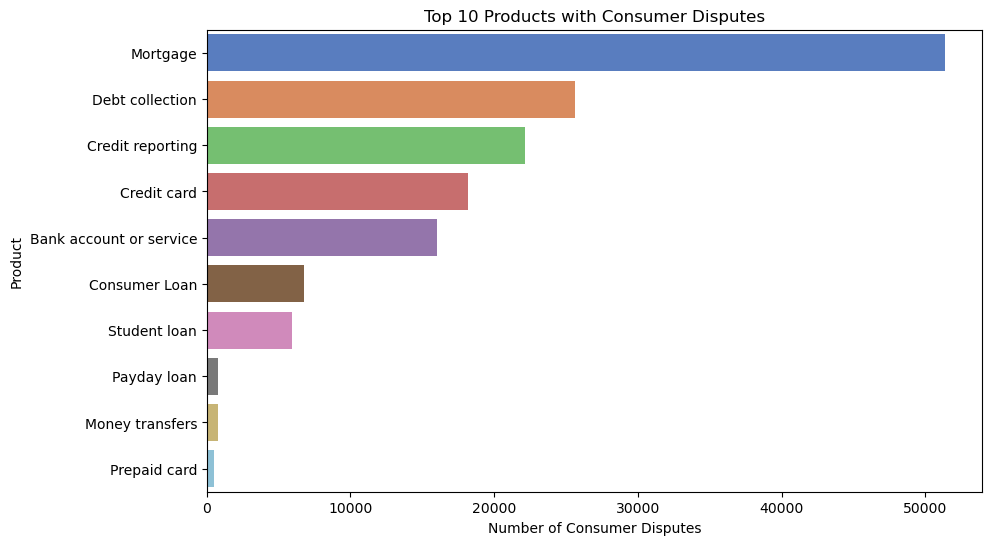

In [28]:
# Get the top 10 products with consumer disputes
top_products_disputed = df_1[df_1['Consumer disputed?'] == 'Yes']['Product'].value_counts().head(10)

# Plot the top 10 products with consumer disputes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_disputed.values, y=top_products_disputed.index, palette='muted')
plt.xlabel('Number of Consumer Disputes')
plt.ylabel('Product')
plt.title('Top 10 Products with Consumer Disputes')
plt.show();


# Top products vs Zip code

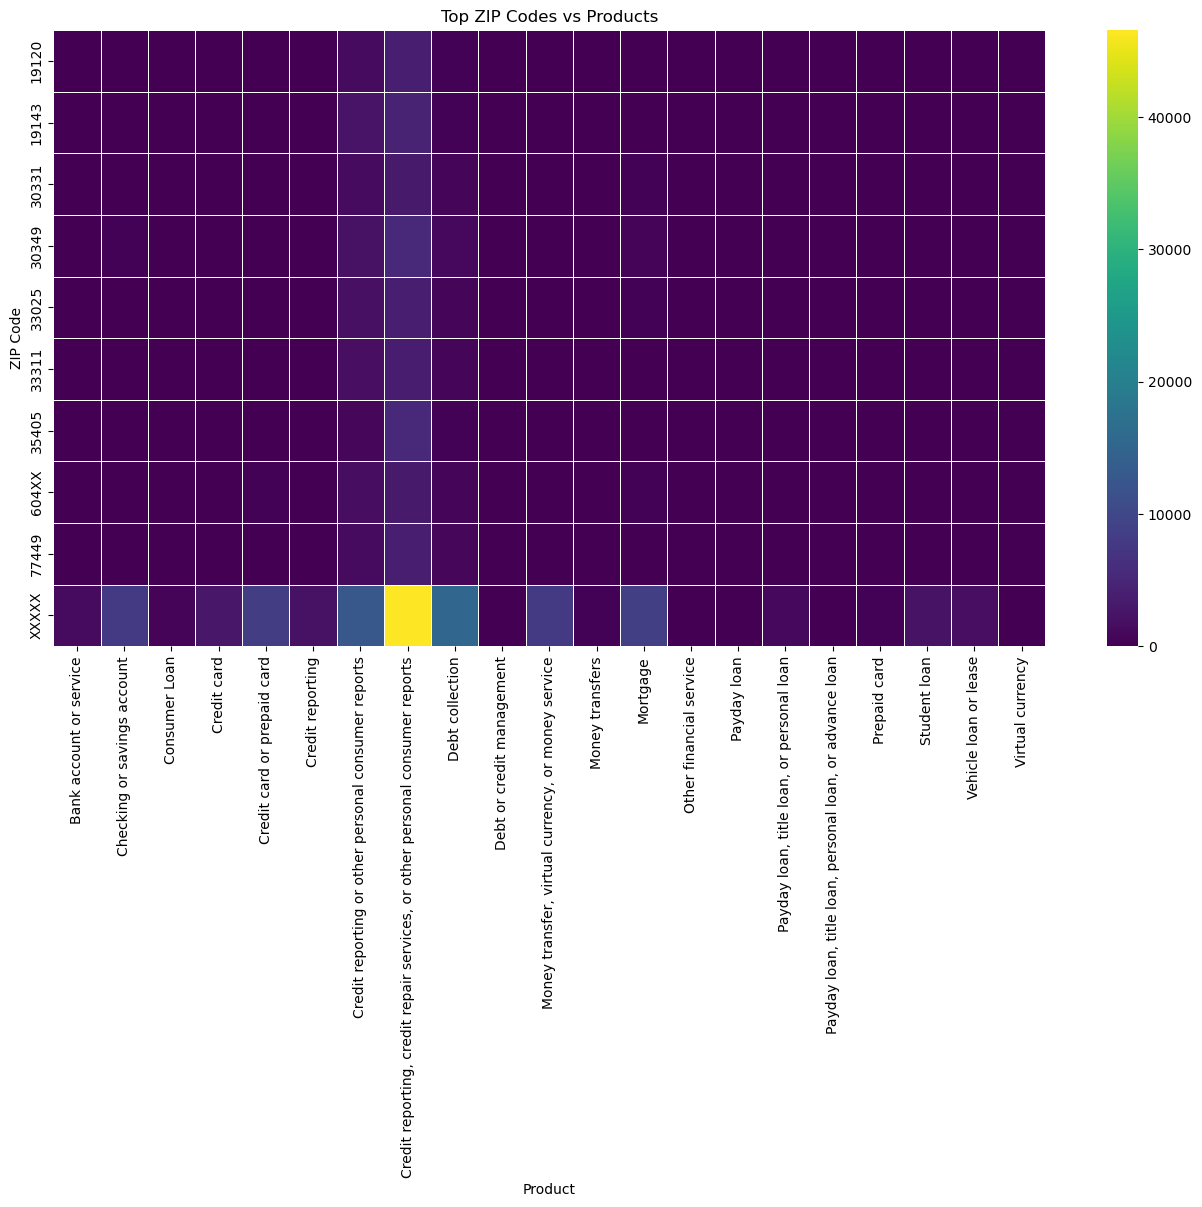

In [35]:
#  top 10 ZIP codes with the highest number of complaints
top_zip_codes = df_1['ZIP code'].value_counts().head(10).index

df_top_zip_codes = df_1[df_1['ZIP code'].isin(top_zip_codes)]

zip_code_product_counts = df_top_zip_codes.groupby(['ZIP code', 'Product']).size().unstack(fill_value=0)

# Get the top 10 products
top_products = df_1['Product'].value_counts().head(10).index

df_top_products = df_1[df_1['Product'].isin(top_products)]


product_zip_counts = df_top_products.groupby(['Product', 'ZIP code']).size().unstack(fill_value=0)


# Plotting the heatmap for top ZIP codes
plt.figure(figsize=(16, 8))
sns.heatmap(zip_code_product_counts, cmap='viridis', linewidths=0.5)
plt.title('Top ZIP Codes vs Products')
plt.xlabel('Product')
plt.ylabel('ZIP Code')
plt.show();



# Top products vs State

<Figure size 4200x2000 with 0 Axes>

<Axes: xlabel='State', ylabel='Product'>

Text(0.5, 1.0, 'Top Products vs Top States')

Text(0.5, 190.7222222222222, 'State')

Text(495.72222222222223, 0.5, 'Product')

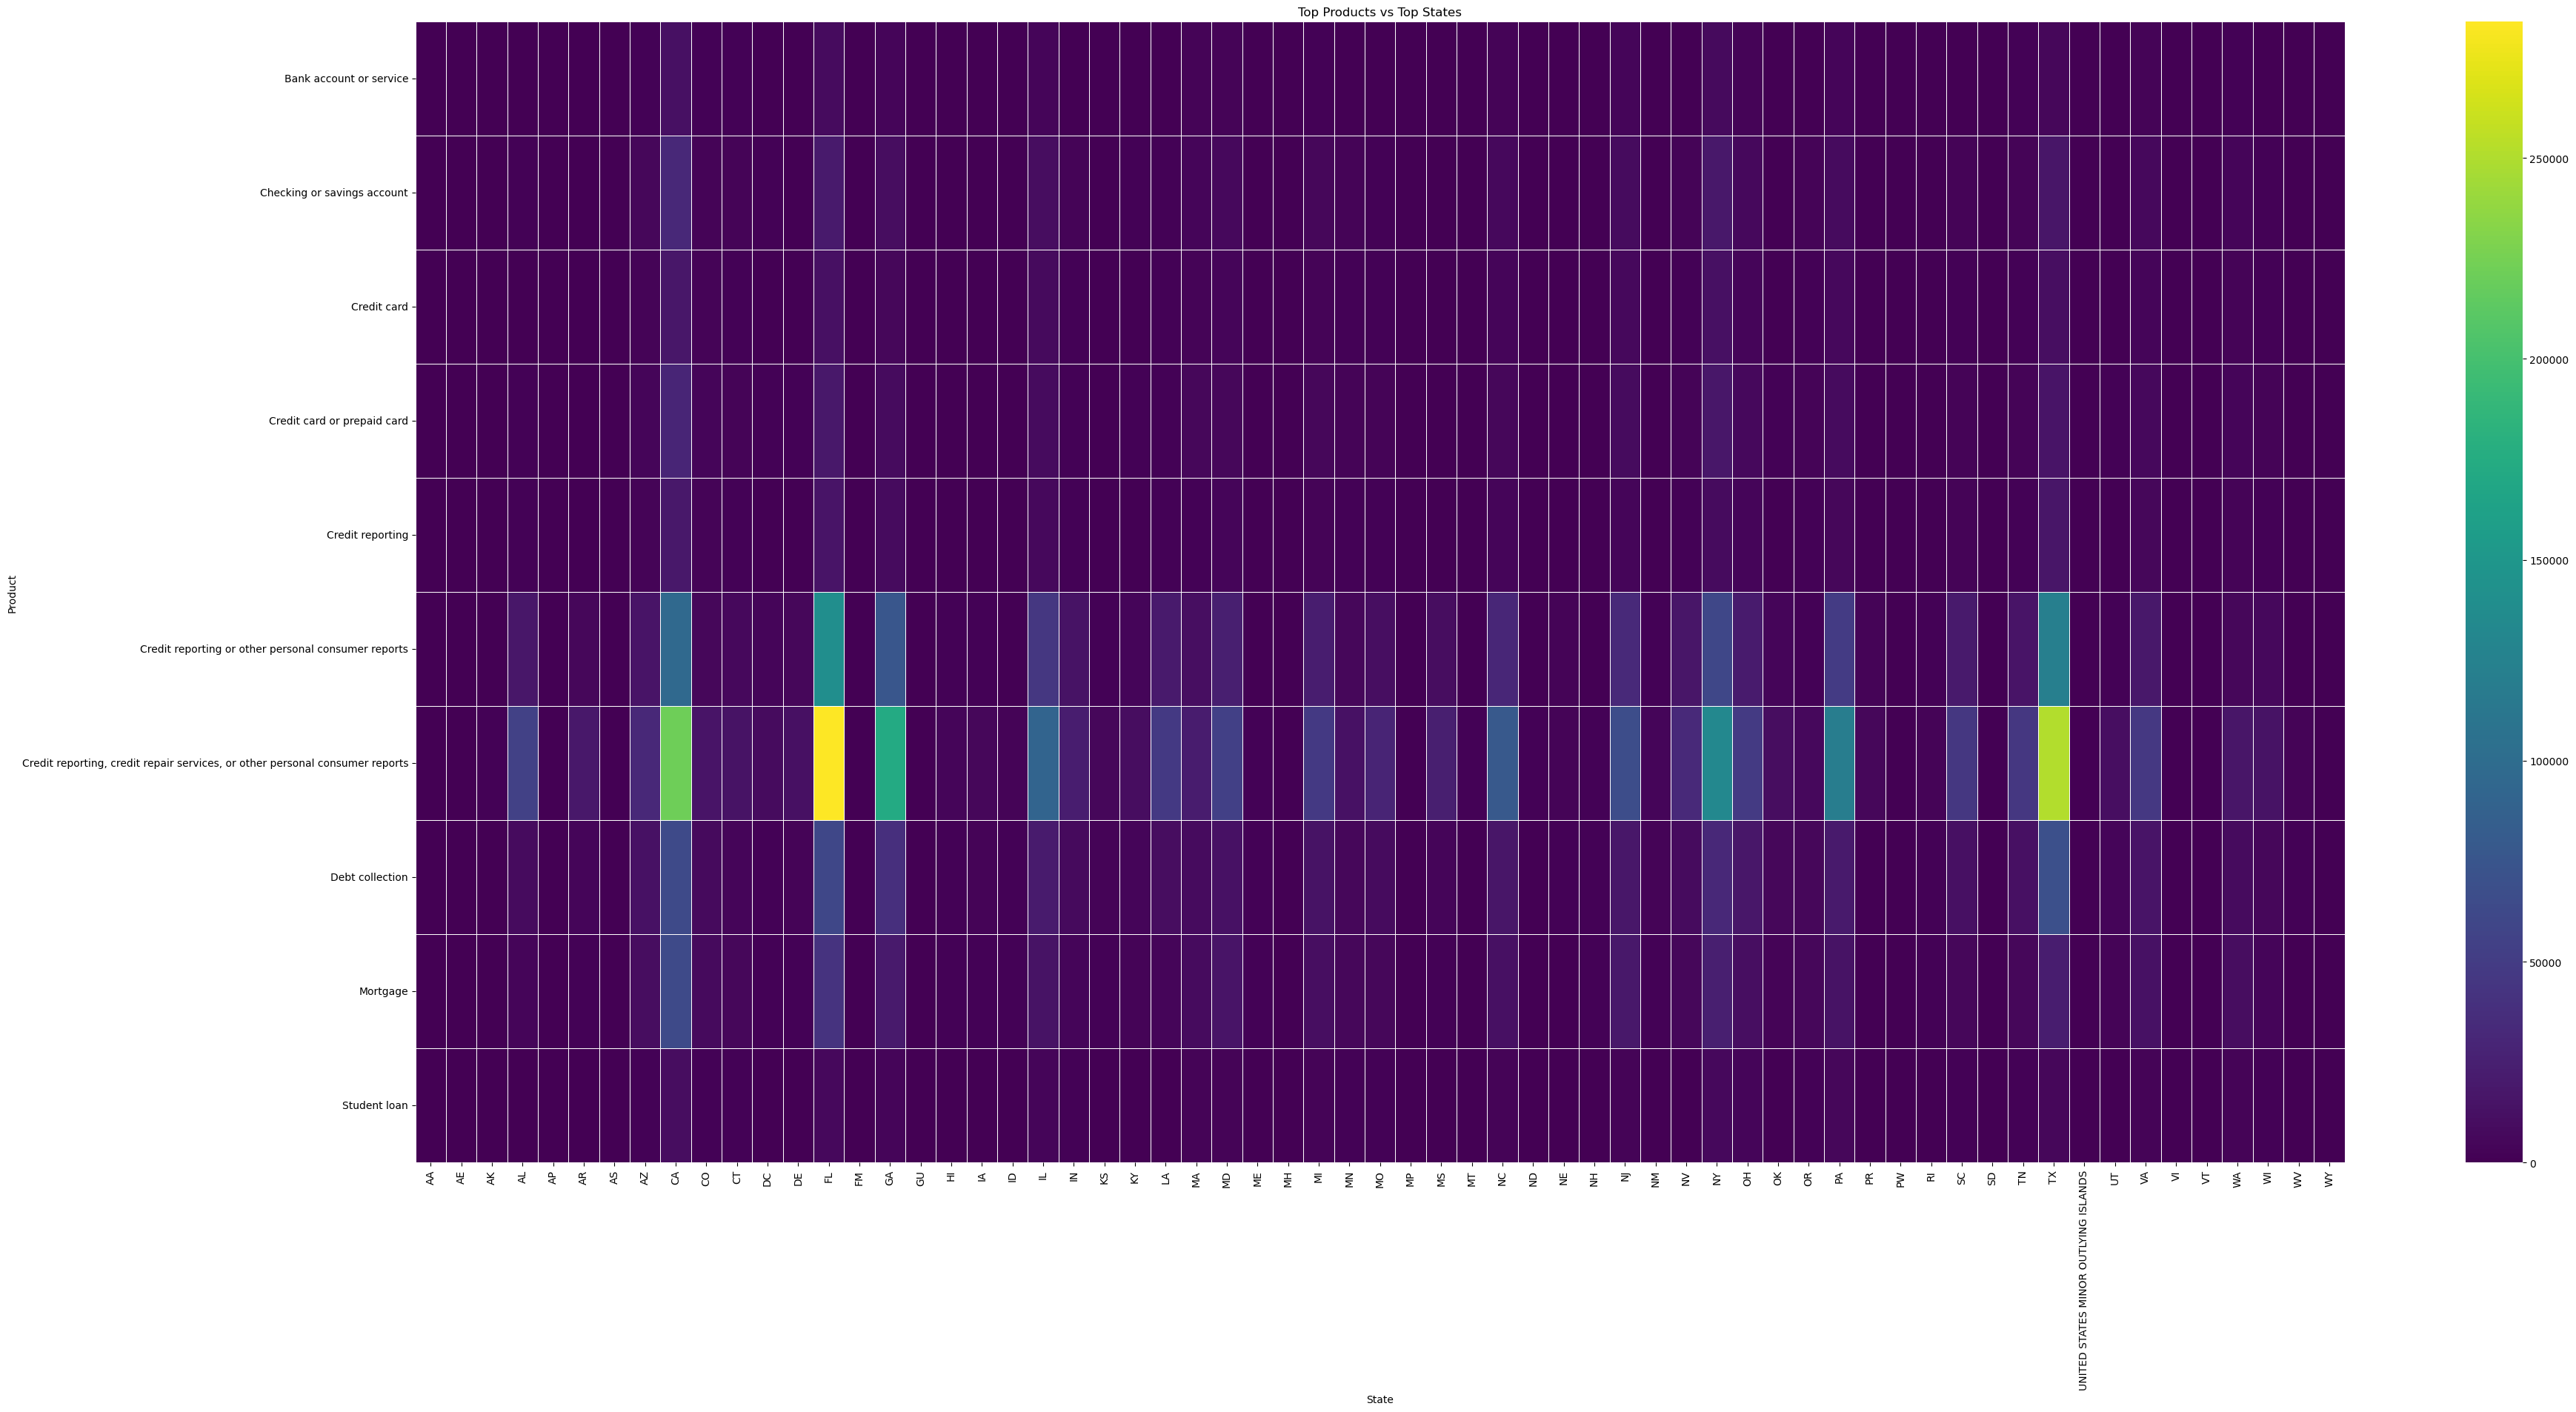

In [31]:

# top 10 products
top_products = df_1['Product'].value_counts().head(10).index

df_top_products = df_1[df_1['Product'].isin(top_products)]

# top 10 states
top_states = df_1['State'].value_counts().head(10).index

# Filter the DataFrame to include only the top states
df_top_states = df_1[df_1['State'].isin(top_states)]

# Group by 'Product' and 'State' and count the number of complaints
product_state_counts = df_top_products.groupby(['Product', 'State']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(42, 20))
sns.heatmap(product_state_counts, cmap='viridis', linewidths=0.5)
plt.title('Top Products vs Top States')
plt.xlabel('State')
plt.ylabel('Product')
plt.show();


# Top issues over the years

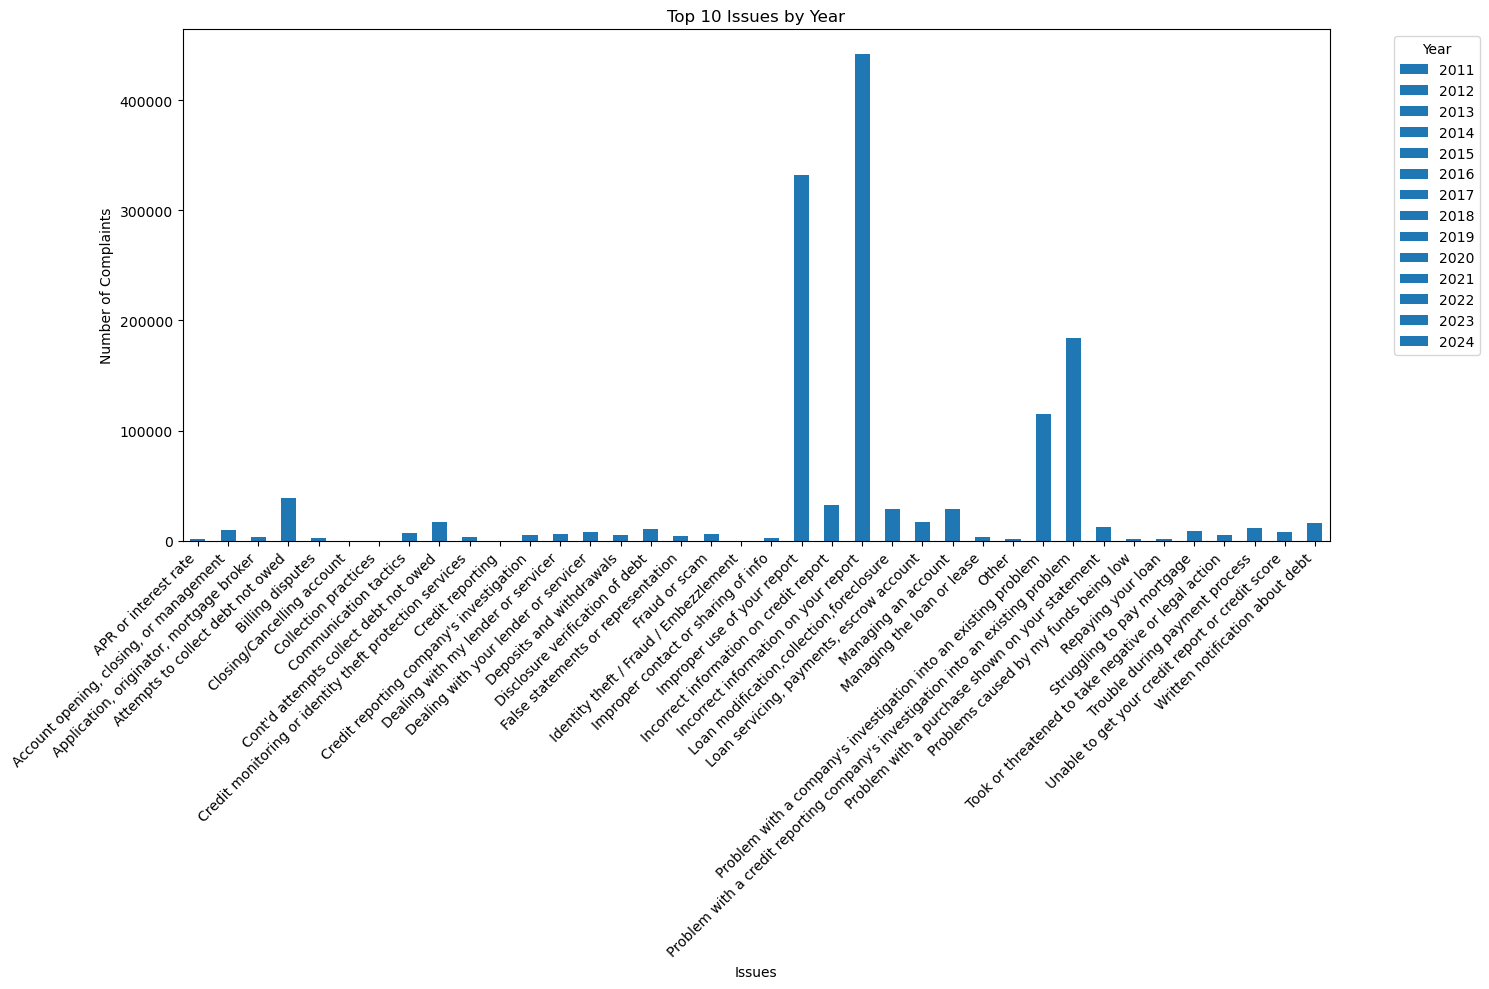

In [53]:
# Extract the year from the 'Date received' column
df_1['Year'] = df_1['Date received'].dt.year

#  Group by year and issue, then count occurrences
issue_counts_by_year = df_1.groupby(['Year', 'Issue']).size().unstack(fill_value=0)

#  top 10 issues for each year
top_10_issues_by_year = issue_counts_by_year.apply(lambda x: x.sort_values(ascending=False).head(10), axis=1)

#  Plotting
plt.figure(figsize=(15, 10))

for year in top_10_issues_by_year.index:
    top_10_issues = top_10_issues_by_year.loc[year]
    top_10_issues.plot(kind='bar', label=str(year))

plt.xlabel('Issues')
plt.ylabel('Number of Complaints')
plt.title('Top 10 Issues by Year')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();


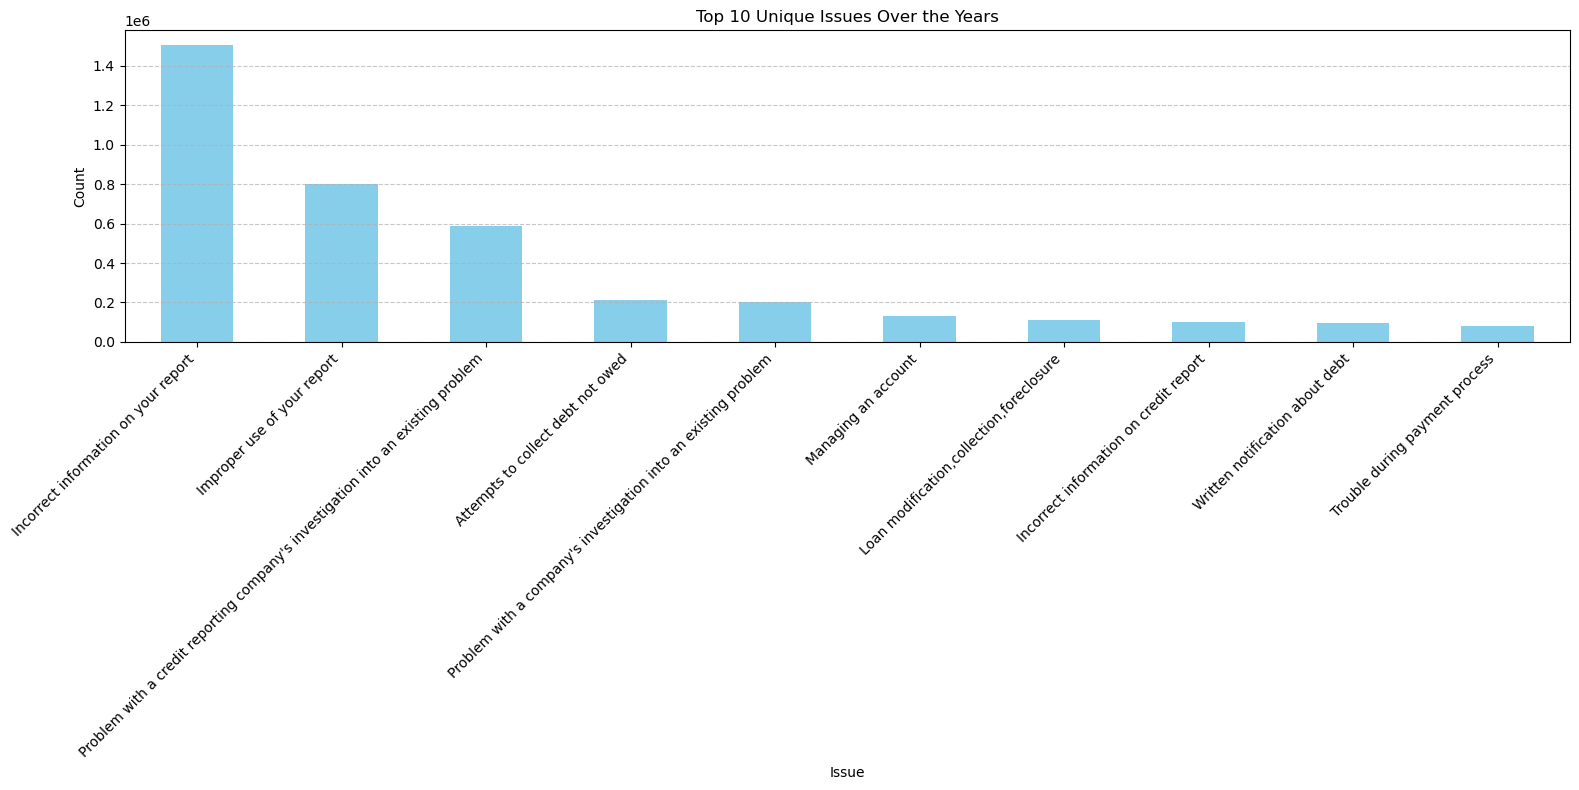

In [55]:

issue_counts_by_year = df_1.groupby(['Year', 'Issue']).size().unstack(fill_value=0)

# Sum up the counts across all years
overall_issue_counts = issue_counts_by_year.sum()

# Find the top 10 issues
top_10_issues_overall = overall_issue_counts.sort_values(ascending=False).head(10)


# Plotting the top 10 unique issues
plt.figure(figsize=(16, 8))
top_10_issues_overall.plot(kind='bar', color='skyblue')
plt.title('Top 10 Unique Issues Over the Years')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();


# Top companies vs Top issues

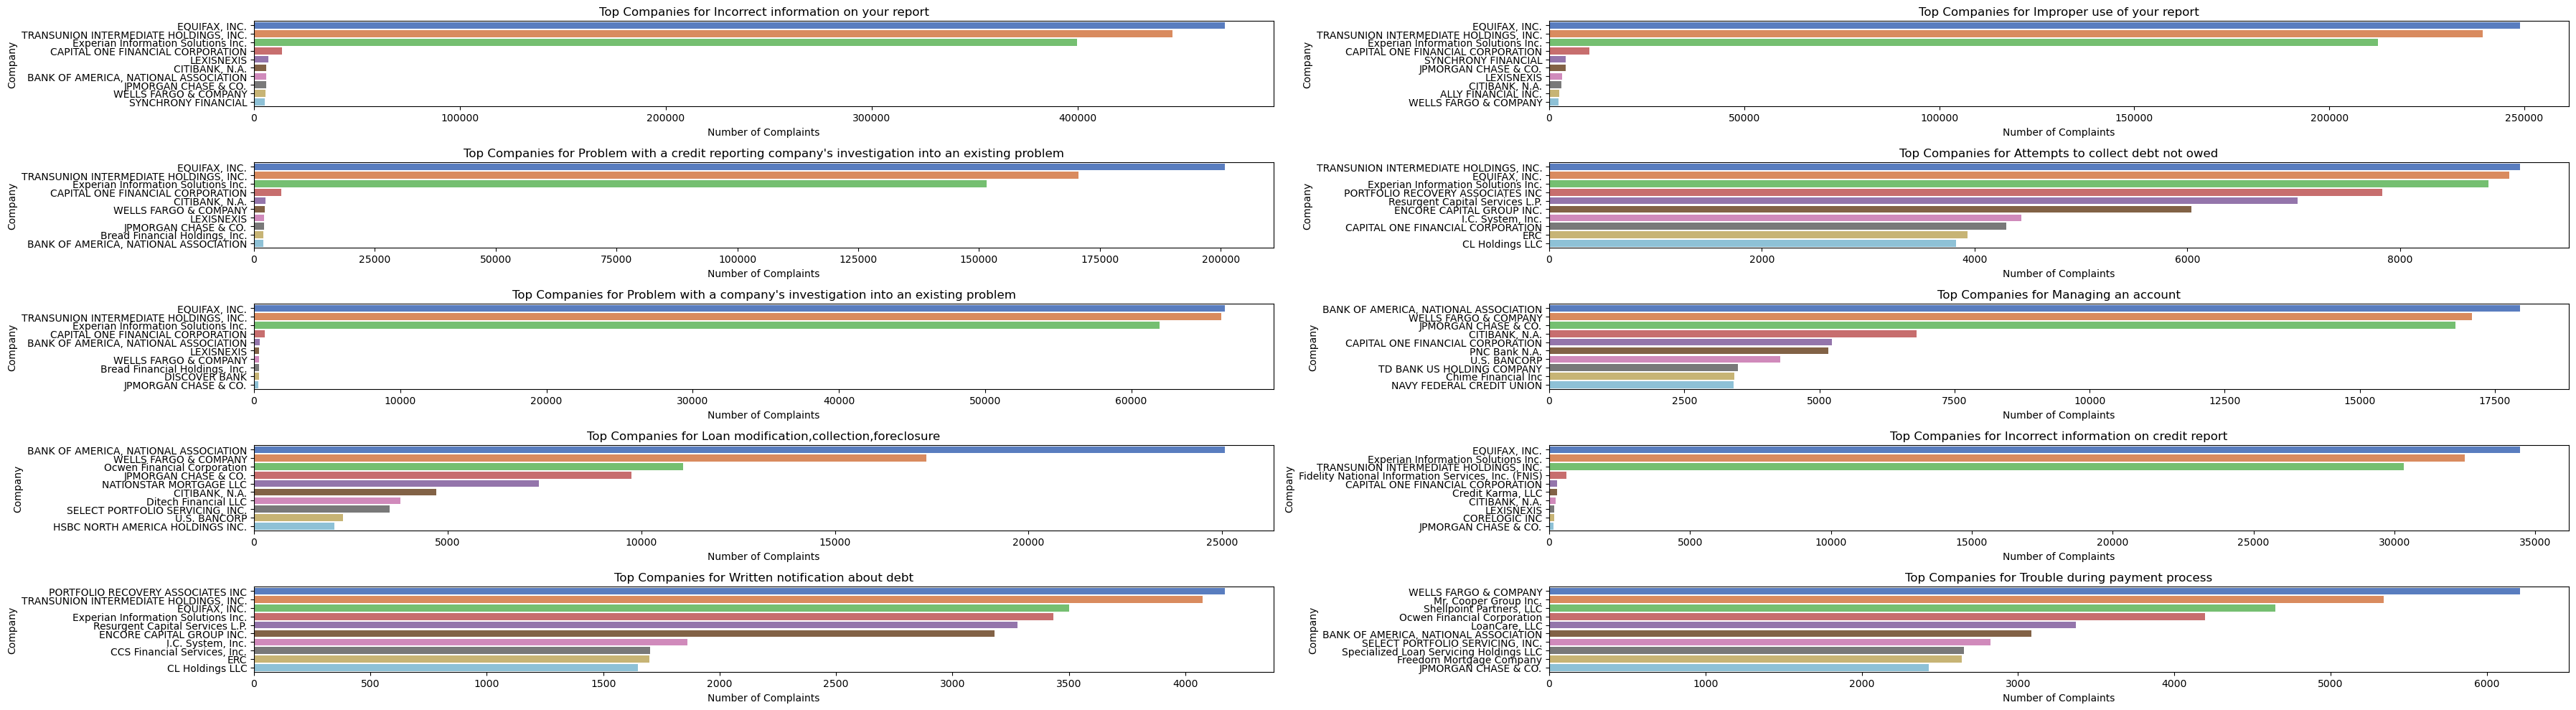

In [64]:
# top 10 issues by the number of complaints
top_10_issues = df_1['Issue'].value_counts().head(10).index.tolist()

top_companies_by_issue = {}


for issue in top_10_issues:
    issue_df = df_1[df_1['Issue'] == issue]
    top_companies = issue_df['Company'].value_counts().head(10)
    top_companies_by_issue[issue] = top_companies

# Plotting the top companies for each of the top 10 issues
plt.figure(figsize=(36, 10))

# Iterate over the top 10 issues
for i, issue in enumerate(top_10_issues, start=1):
    plt.subplot(5, 2, i)
    top_companies = top_companies_by_issue[issue]
    # Plot the bar chart
    sns.barplot(x=top_companies.values, y=top_companies.index, palette='muted')
    plt.title('Top Companies for {}'.format(issue))
    plt.xlabel('Number of Complaints')
    plt.ylabel('Company')

plt.tight_layout()
plt.show();


# Top issues vs Company public response

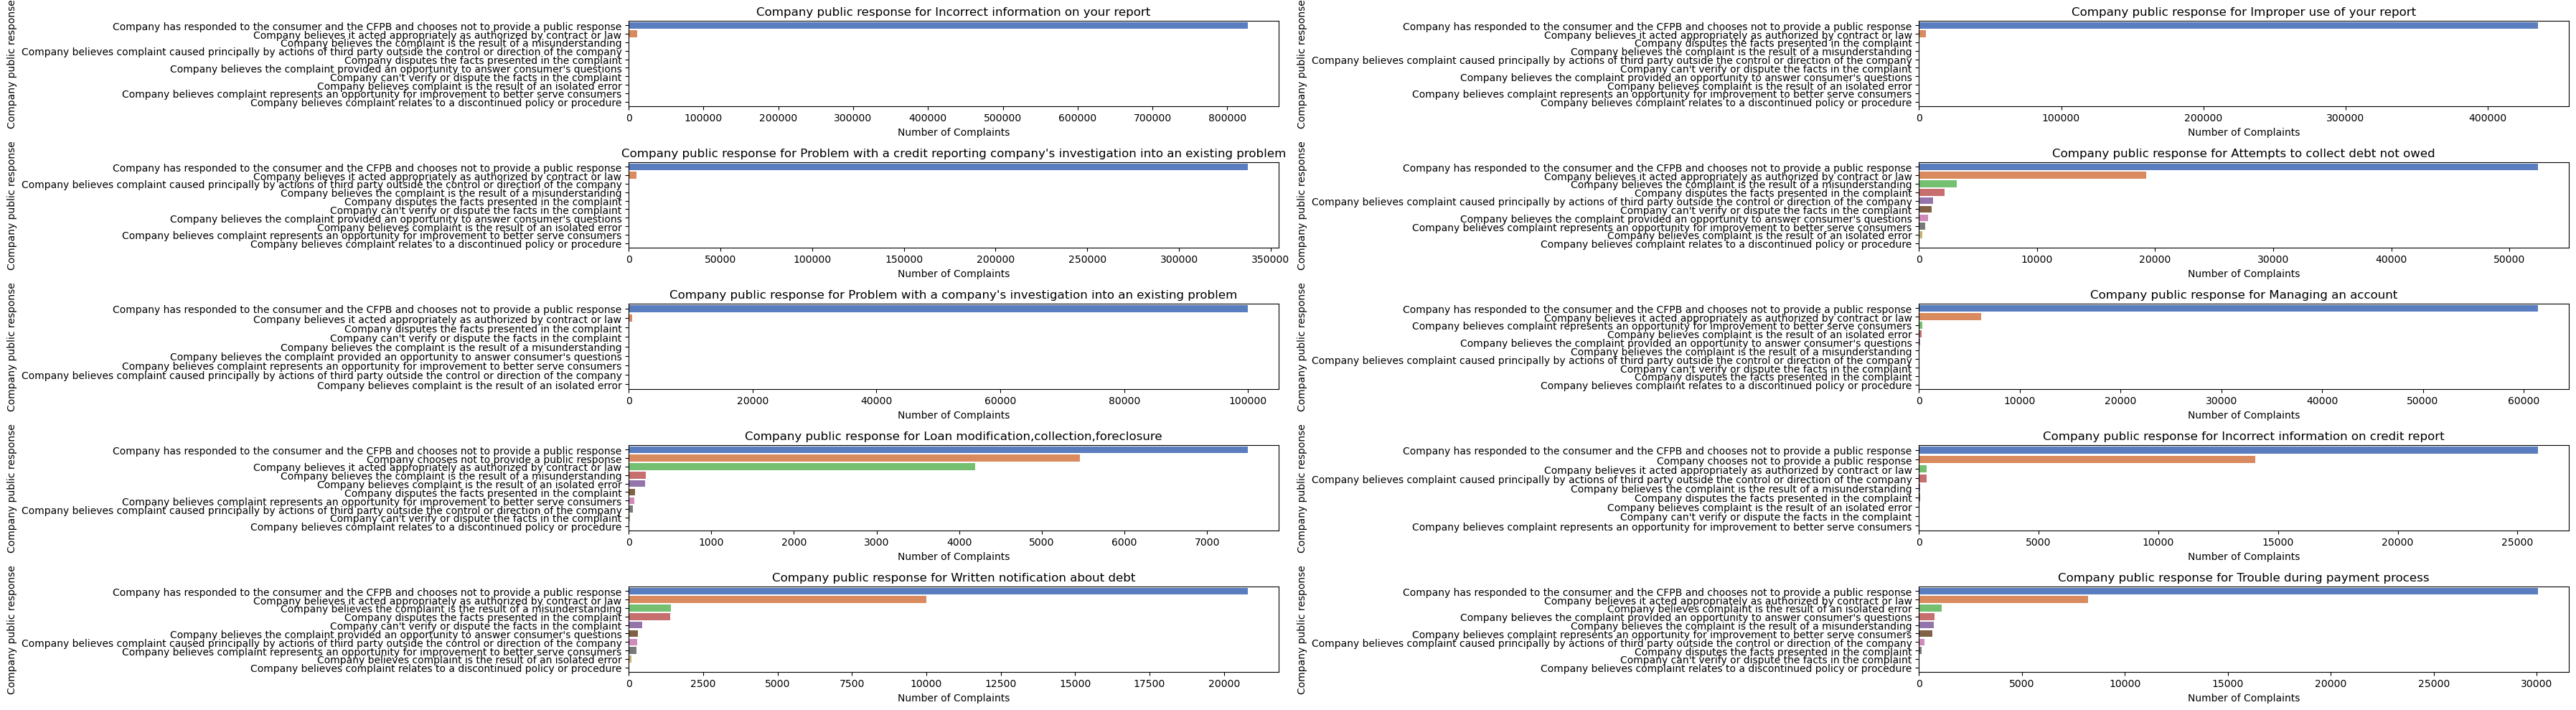

In [66]:
# top 10 issues by the number of complaints
top_10_issues = df_1['Issue'].value_counts().head(10).index.tolist()

# Create a dictionary to store the top companies for each issue's public response
top_companies_by_issue = {}

for issue in top_10_issues:
    issue_df = df_1[df_1['Issue'] == issue]
    top_companies = issue_df['Company public response'].value_counts().head(10)
    top_companies_by_issue[issue] = top_companies

# Plotting the top companies for each of the top 10 issues
plt.figure(figsize=(36, 10))

for i, issue in enumerate(top_10_issues, start=1):
    plt.subplot(5, 2, i)
    top_companies = top_companies_by_issue[issue]
    # Plot the bar chart
    sns.barplot(x=top_companies.values, y=top_companies.index, palette='muted')
    plt.title('Company public response for {}'.format(issue))
    plt.xlabel('Number of Complaints')
    plt.ylabel('Company public response')

plt.tight_layout()
plt.show();


# Top issues vs Time Respondse

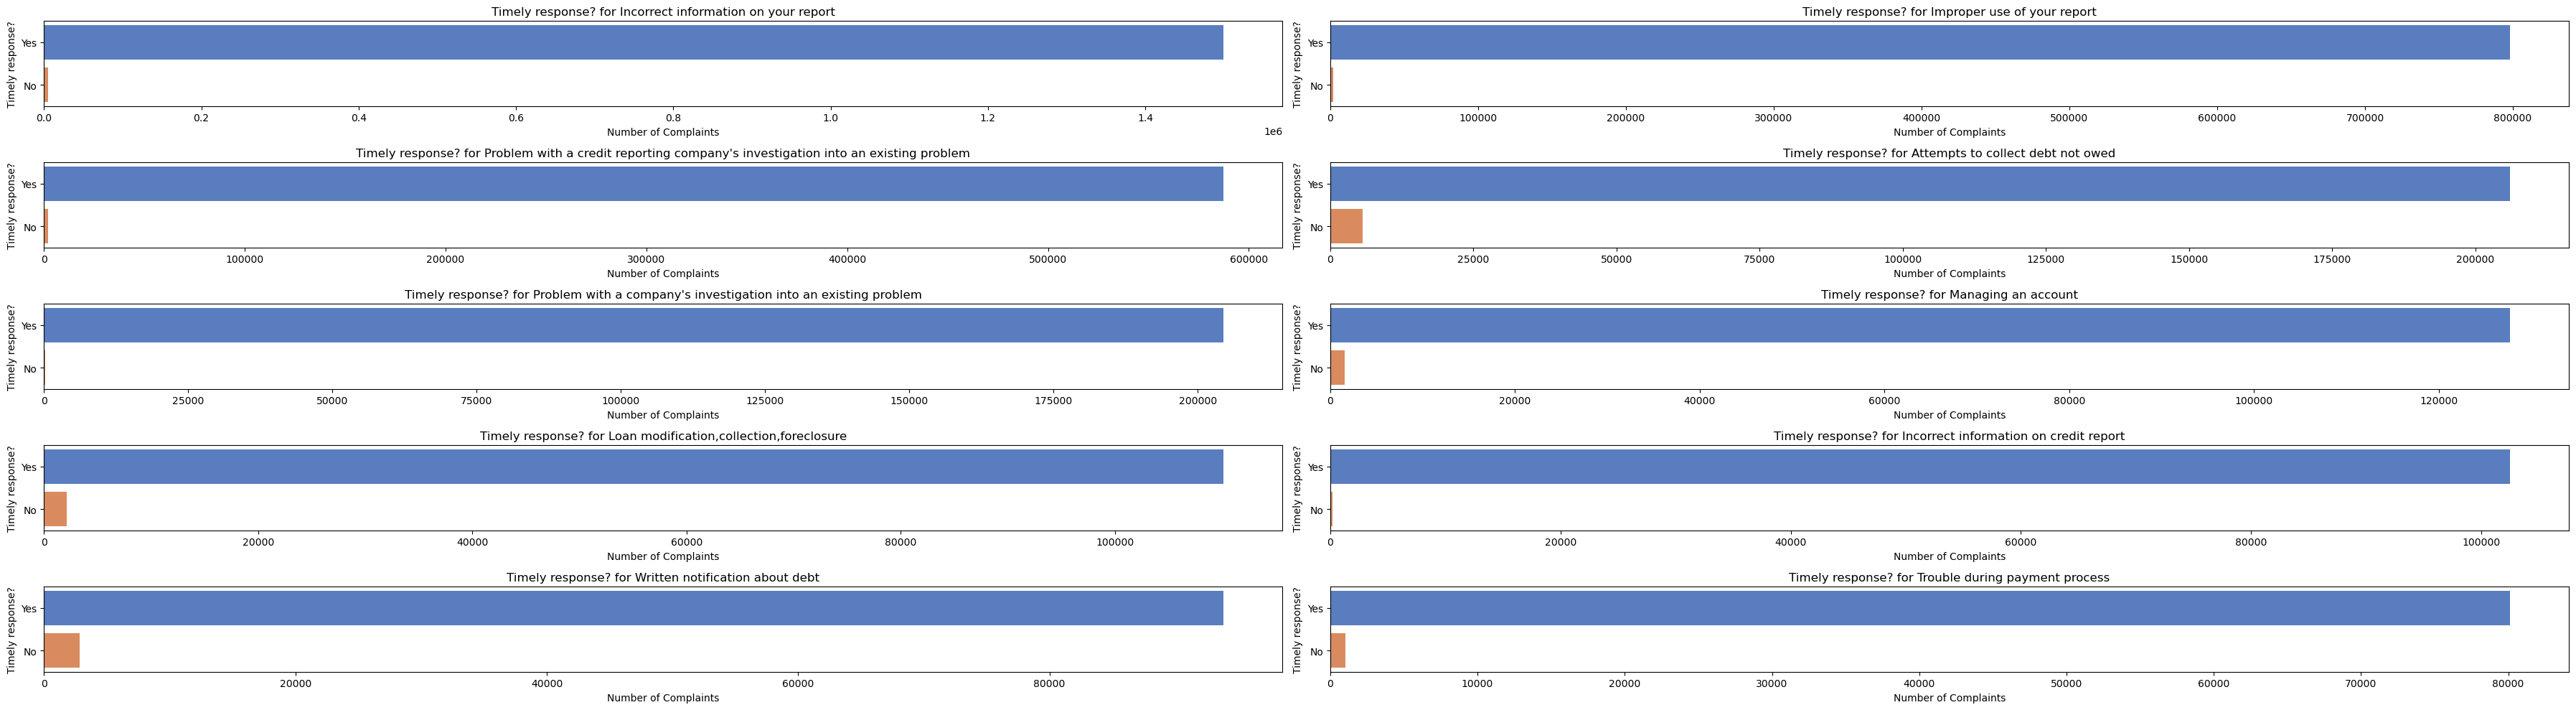

In [68]:
# The top 10 issues by the number of complaints
top_10_issues = df_1['Issue'].value_counts().head(10).index.tolist()

top_companies_by_issue = {}

for issue in top_10_issues:

    issue_df = df_1[df_1['Issue'] == issue]

    top_companies = issue_df['Timely response?'].value_counts().head(10)
 
    top_companies_by_issue[issue] = top_companies

# Plotting the top companies for each of the top 10 issues
plt.figure(figsize=(36, 10))


for i, issue in enumerate(top_10_issues, start=1):
    plt.subplot(5, 2, i)
   
    top_companies = top_companies_by_issue[issue]
    # Plot the bar chart
    sns.barplot(x=top_companies.values, y=top_companies.index, palette='muted')
    plt.title('Timely response? for {}'.format(issue))
    plt.xlabel('Number of Complaints')
    plt.ylabel('Timely response?')

plt.tight_layout()
plt.show();


# Top Issue Vs consumer Disputes

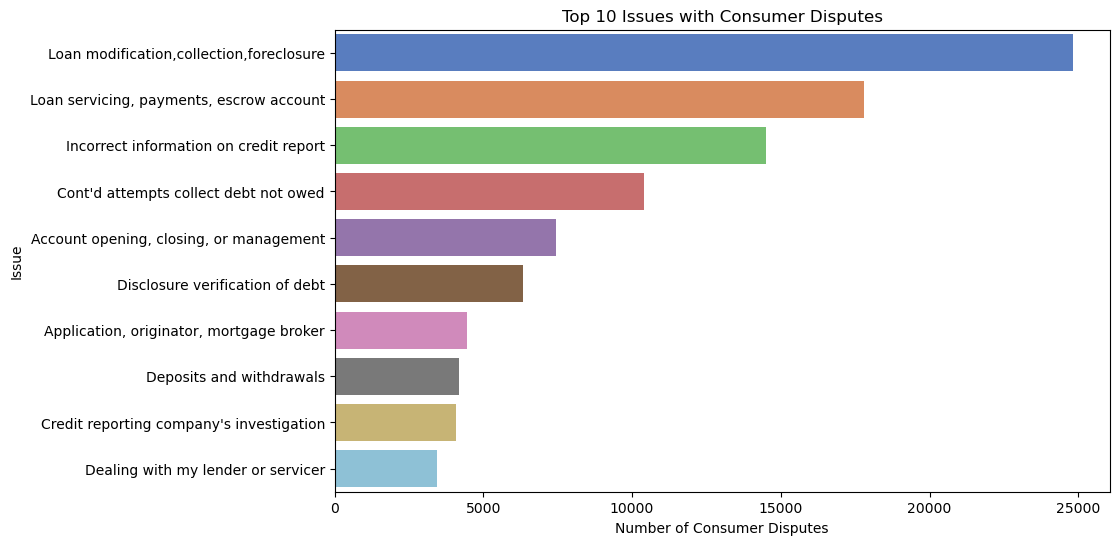

In [71]:
# top 10 issues with consumer disputes
top_issue_disputed = df_1[df_1['Consumer disputed?'] == 'Yes']['Issue'].value_counts().head(10)

# Plot the top 10 issues with consumer disputes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_issue_disputed.values, y=top_issue_disputed.index, palette='muted')
plt.xlabel('Number of Consumer Disputes')
plt.ylabel('Issue')
plt.title('Top 10 Issues with Consumer Disputes')
plt.show();


# 2. Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray).






In [77]:
def longest_arr(nums):
    
    if not nums:
        return 0
    
    dp = [1] * len(nums)
    
    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            dp[i] = dp[i - 1] + 1
    
    return max(dp)

nums = list(map(int,input().split()))

result = longest_arr(nums)

result


 

2 2 2 2 2


1

# 3.Given a list of non negative integers, arrange them such that they form the largest number

In [85]:
def largestNumber(number):
    def compare(x, y):
        return str(y) + str(x) > str(x) + str(y)

    number.sort(key=lambda x: x if not compare(x, x+1) else x+1)

    largest_num = ''.join(map(str, number))

    return largest_num.lstrip('0') or '0'

# Test the function
input_numbers = list(map(int, input().split()))
result = largestNumber(input_numbers)
print(result)


10 2
210


# 4. Store all the &quot;servlet-name&quot;, and &quot;servlet-class&quot; to a csv file from the attached
sample_json.json file using Python.

In [90]:
import json
import csv
import os 

json_file_path = 'C:\\Users\\User\\Downloads\\DT A1 sample_json (1) (1) (1) (1).json'

# Load the JSON file
with open(json_file_path, 'r') as f:
    data = json.load(f)

servlets = data['web-app']['servlet']

# Create a list to store the servlet-name and servlet-class values
servlet_info = []

for servlet in servlets:
    servlet_name = servlet['servlet-name']
    servlet_class = servlet['servlet-class']
    servlet_info.append([servlet_name, servlet_class])

# Define the directory where the CSV file will be saved
csv_directory_path = 'C:\\Users\\User\\OneDrive\\Desktop\\guvi'

# Define the CSV file name
csv_file_name = 'servlets.csv'

csv_file_path = os.path.join(csv_directory_path, csv_file_name)

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['servlet-name', 'servlet-class'])
    writer.writerows(servlet_info)


28